# Домашнее задание №2

SQL-инъекция (SQLi) представляет собой одну из наиболее распространенных и опасных уязвимостей веб-приложений. Она возникает, когда злоумышленник вставляет вредоносные SQL-запросы в поля ввода пользовательских данных. Эти запросы могут позволить злоумышленнику получить несанкционированный доступ к базе данных, извлечь, изменить или удалить данные, а в некоторых случаях даже получить контроль над сервером.

Обнаружение и предотвращение SQL-инъекций крайне важно, поскольку такие атаки могут нанести значительный ущерб как бизнесу, так и пользователям. Традиционные методы защиты включают использование параметризованных запросов, подготовленных выражений и тщательную проверку и экранирование входных данных. Однако, несмотря на эти меры, уязвимости все же могут возникать из-за ошибок в программировании или человеческого фактора.

С развитием технологий машинного обучения (ML) появились новые подходы к обнаружению и предотвращению SQL-инъекций. Методы машинного обучения позволяют анализировать большие объемы данных и выявлять аномалии или подозрительные шаблоны, указывающие на попытку внедрения вредоносного SQL-запроса. Системы, основанные на ML, могут обучаться на исторических данных и адаптироваться к новым видам атак, что делает их мощным инструментом для обеспечения безопасности веб-приложений.

## Подготовка виртуального окружения Python

Предварительно нужно установить все зависимые модули. Все необходимые зависимости перечислены в requirements.txt файле. Чтобы установить зависимости, выполните в терминале следующую команду:

python3 -m pip install -r requirements.txt

## Описания задания

В данном задании мы постараемся изучить возможность детектирования SQL-инъекций на основе подхода обработки естественного языка (NLP) к анализу данных. Современные методы NLP позволяют эффективно обрабатывать и анализировать текстовые данные, выявляя закономерности и аномалии, которые могут ускользнуть от традиционных методов защиты.

Используя инструменты и методы NLP, мы будем анализировать текстовые входные данные веб-приложений, чаще всего передаваемый в полезной нагрузки прикладных протоколов, чтобы обнаружить подозрительные паттерны, характерные для SQL-инъекций. Это включает в себя такие техники, как токенизация (`RegexpTokenizer`), векторизация текста (`TfidfVectorizer`, `CountVectorizer`), предобработка данных (отброс несущественных токенов на основе анализа главных компонент),обучение моделей классификации.

В рамках работы вам предоставлено два размеченных датасета (`train-dataset.tsv` и `test-dataset.csv`)  с полезной нагрузкой в виде текста и метки 0 (легитимный текст) и 1 (payload содержащий sql инъекцию) 

Для выполнения домашнего задания вам необходимо:
1. Предустановить зависимости:
```shell
$ pip install -r requirements.txt
```
2. Загрузить исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разбить его на обучающий и тестовый набор данных: 
```python
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
x_train, y_train = df_train['payload'].values, df_train['label'].values
x_test, y_test = df_test['payload'].values, df_test['label'].values
```

3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

5. Обучить модель на выбранных ключевых признаках

6. Протестировать обученную модель на тестовых данных из набора `train-dataset.tsv`

7. Подсчитать accuracy, построить матрицу ошибок

8. Загрузить тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

9. Протестировать предобученную модель на новом наборе данных

10. Подсчитать accuracy, построить матрицу ошибок

11. Рассмотреть различные модели классификации, а также различные способы векторизации и токенизации данных, сравнить полученные результаты между собой

## Теоретический материал

Процесс машинного обучения моделей классификации позволяющих обнаруживать SQL инъекции можно свести к следующим этапам: 

#### 1. Предварительная обработка данных

Основная цель предварительной обработки данных — подготовить текстовые данные для дальнейшего анализа. Это включает следующие шаги:

- Токенизация: Разбиение текста на отдельные слова или фразы (токены).
- Очистка текста: Удаление лишних символов, знаков препинания, стоп-слов и приведение слов к нижнему регистру.
- Лемматизация или стемминг: Приведение слов к их начальной или базовой форме для уменьшения количества уникальных слов.


**RegexpTokenizer** (регулярный токенизатор) — это инструмент для разбиения текста на токены (слова или фразы) с использованием регулярных выражений. Регулярные выражения позволяют задавать сложные шаблоны для поиска и извлечения нужных частей текста.

#### 2. Векторизация данных

Наиболее простым споосбом векторизации является `CountVectorizer`:

`CountVectorizer` — это инструмент для преобразования текста в числовые векторы путем подсчета количества вхождений каждого слова в документ. В результате каждый документ представляется как вектор, где каждая позиция соответствует определенному слову, а значение в позиции — количество вхождений этого слова в документе.

Пример:

Документ 1: "SELECT * FROM users"
Документ 2: "DROP TABLE users"
Векторизация: [1, 1, 1, 0, 0] и [0, 0, 0, 1, 1]
где каждая позиция соответствует слову(токену) из словаря: ["SELECT", "*", "FROM", "DROP", "TABLE"].

Другим способом векторизации является `TfidfVectorizer`:

`TfidfVectorizer` (Term Frequency-Inverse Document Frequency Vectorizer) — это инструмент обработки текста, используемый для преобразования текстовых данных в числовые векторы на основе значимости слов. Этот метод учитывает как частоту появления слова в документе (term frequency, TF), так и обратную частоту появления слова во всех документах коллекции (inverse document frequency, IDF).

- TF (term frequency): измеряет частоту появления слова в документе. Обычно рассчитывается как отношение количества вхождений слова к общему количеству слов в документе: tf(t, d) = f(t, d) / sum(f(t', d) for t' in d)
- IDF (inverse document frequency): измеряет, насколько редким или распространенным является слово в коллекции документов. Рассчитывается как логарифм отношения общего количества документов к количеству документов, содержащих данное слово: idf(t) = log(N / df(t))

- Итоговый вес токена: tf-idf(t, d) = tf(t, d) * log(N / df(t))

#### 3. Отбор токенов (Отбор признаков)

Отбор токенов (или признаков) является важным шагом, который позволяет уменьшить размерность данных, улучшить производительность модели и избежать переобучения. Для этого используются различные методы, включая статистические и алгоритмические подходы:

- `SelectFromModel`: Метод для отбора признаков, основанный на важности признаков, которую определяет обученная модель. Например, можно использовать Lasso (линейная модель с L1-регуляризацией) для оценки важности признаков.

- `TruncatedSVD`: Метод понижения размерности, который применим к разреженным матрицам, например, к тем, которые получены с помощью `CountVectorizer` или `TfidfVectorizer`. `TruncatedSVD` уменьшает размерность данных, сохраняя наиболее важную информацию.

Также возможно комбинация данных методов, для повышения точности отбора признаков.

#### 4. Обучение модели

После векторизации текстовых данных их можно использовать для обучения моделей машинного обучения. Основные шаги включают:

- Разделение данных: Разделение данных на тренировочные и тестовые наборы.
- Выбор модели: Выбор алгоритма машинного обучения, такого как логистическая регрессия, случайный лес, метод опорных векторов (SVM) или нейронные сети.
- Обучение модели: Обучение модели на тренировочных данных с использованием векторизованных текстов.
- Оценка модели: Оценка точности и эффективности модели на тестовых данных с помощью метрик, таких как точность, полнота, F-мера.

#### 5. Обнаружение SQL-инъекций

После обучения модель можно использовать для классификации новых входных данных. При поступлении нового ввода текстовые данные проходят через этапы предварительной обработки и векторизации, после чего обученная модель определяет, является ли ввод подозрительным на наличие SQL-инъекций.
Преимущества подхода на основе NLP

- Адаптивность: Модели машинного обучения могут адаптироваться к новым типам атак, обучаясь на новых данных.
- Автоматизация: Системы на основе NLP могут автоматически анализировать и классифицировать большое количество входных данных, что повышает эффективность обнаружения уязвимостей.
- Точность: Использование методов векторизации, таких как TF-IDF, позволяет учитывать контекст и значимость слов, что улучшает точность классификации.

Использование методов NLP и машинного обучения для обнаружения SQL-инъекций представляет собой современный и эффективный подход, способный значительно повысить уровень безопасности веб-приложений. 

## Описание лабораторного стенда

#### Описание `FeatureExtractor` 
`FeatureExtractor` — класс, отвечающий за извлечение признаков (токенизацию и векторизацию данных) из исходных датафреймов. Имеет два метода:

`fit_extract` — анализирует предоставленные тексты и строит внутренние структуры данных, такие как словарь терминов (слов) и их IDF (inverse document frequency, обратная частота документа) значения. IDF вычисляется как логарифм отношения общего количества документов к количеству документов, содержащих данный термин, после чего преобразует текстовые данные в векторное представление на основе вычисленных векторов TF-IDF;

`extract_features` — выполняет только преобразование входных текстовых данных в соответствующие вектора TF-IDF с использованием уже обученных внутренних структур, таких как словарь терминов и IDF значения.

`FeatureExtractor` — поддерживает следующие режимы работы:

* TF-IDF ('tf-idf'):

    Описание: TF-IDF (Term Frequency-Inverse Document Frequency) — это метод вычисления веса слова в документе относительно его важности в коллекции документов.
    Применение: Каждый документ представляется в виде вектора, где каждая компонента отражает вес термина (слова), вычисленный по формуле TF-IDF. Этот метод учитывает и частоту встречаемости слова в документе (TF) и обратную частоту документа (IDF).
    Пример: Используется для извлечения ключевых признаков из текста, что полезно для задач, таких как классификация текстов, кластеризация и информационный поиск.

* TF-IDF с N-граммами ('tf-idf_ngram'):

    Описание: Этот режим также использует TF-IDF, но включает векторизацию не только отдельных слов, но и последовательностей из N смежных слов (N-грамм).
    Применение: Учитывает контекстуальные зависимости между последовательными словами, что может улучшить качество представления текста, особенно для задач, где важен порядок слов, например, в задачах машинного перевода или анализе sql запросов.

* Мешок слов ('bag_of_words'):

    Описание: Это простой метод векторизации, который представляет каждый документ в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного слова из словаря.
    Применение: Подходит для задач, где важно только наличие слова в тексте, а не его частота или важность. Обычно используется в моделях, требующих быстрое обучение и простоту интерпретации, таких как методы наивного Байеса или простые линейные модели.

* Мешок символов ('bag_of_characters'):

    Описание: Этот метод представляет текст в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного символа в тексте.
    Применение: Полезен в задачах, где важны структура или последовательность символов, таких как распознавание рукописного текста или анализ кодов программ. 

#### Описание `FeatureSelecter`
`FeatureSelecter` — класс, реализующий отбор ключевых токенов из общего набора. Отбор производится двумя комбинацией двух методов: SelectFromModel(Lasso) и TruncatedSVD.

`fit_transform` — Обучает SelectFromModel и TruncatedSVD модели на тренировочных данных. Преобразует тренировочные данные с использованием обученных моделей. Возвращает преобразованные тренировочные данные.

`transform` — выполняет только отбор токенов на основе работы предобученных моделей.


#### Описание `ModelFabric` 
`ModelFabric` — класс, предоставляющий единый интерфейс для создания моделей классификации данных

Поддерживает создание следующих моделей:
* XGBOOST
* SVC
* NU_SVC
* KNEIGHBORS
* DECISION_TREE
* RANDOM_FOREST
* ADABOOST
* BAGGING
* EXTRA_TREES
* LINEAR_SVC

In [1]:
import time
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer

import warnings

from streamlit import dataframe

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [2]:
class ExtractMethods:
    TF_IDF = 'tf-idf'
    TF_IDF_NGRAM = 'tf-idf_ngram'
    BAG_OF_WORDS = 'bag_of_words'
    BAG_OF_CHAR = 'bag_of_characters'


class FeatureExtractor:
    def __init__(self, method, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        self.notes = {}
        self.vectorizer = self._get_vectorizer(method, args, kwargs)
        self.method = method

    def _get_vectorizer(self, method, *args, **kwargs):
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        match method:
            case ExtractMethods.TF_IDF:
                return TfidfVectorizer(tokenizer=token.tokenize, *self.args, **self.kwargs)
            case ExtractMethods.TF_IDF_NGRAM:
                return TfidfVectorizer(
                    lowercase=True, stop_words='english',
                    ngram_range=(1, 3),
                    tokenizer=token.tokenize, analyzer='char'
                )
            case ExtractMethods.BAG_OF_WORDS:
                return CountVectorizer(analyzer='word', **self.kwargs)
            case ExtractMethods.BAG_OF_CHAR:
                return CountVectorizer(analyzer='char', tokenizer=token.tokenize, **self.kwargs)
            case _:
                raise ValueError(f"Unknown feature extraction method: {self.method}")

    def fit_extract(self, x_train):
        return self.vectorizer.fit_transform(x_train)

    def extract_features(self, x):
        return self.vectorizer.transform(x)

In [3]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [4]:
class FeatureSelecter:
    def __init__(self, n_components):
        self._scaler = StandardScaler(with_mean=False)
        self._lasso_selecter = SelectFromModel(Lasso(alpha=0.001, random_state=10))
        self._pca = TruncatedSVD(n_components=n_components)

    def fit_transform(self, x_train, y_train):
        self._scaler.fit(x_train)
        self._lasso_selecter.fit(self._scaler.transform(x_train), y_train)
        self._pca.fit(self._lasso_selecter.transform(self._scaler.transform(x_train)))

        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x_train)))

    def transform(self, x):
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x)))

In [5]:
import xgboost as xgb
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier

In [6]:
class Models:
    XGBOOST = 'XGBoost'
    SVC = 'SVC'
    NU_SVC = 'NuSVC'
    KNEIGHBORS = 'KNeighbors'
    DECISION_TREE = 'DecisionTree'
    RANDOM_FOREST = 'RandomForest'
    ADABOOST = 'AdaBoost'
    BAGGING = 'Bagging'
    EXTRA_TREES = 'ExtraTrees'
    LINEAR_SVC = 'LinearSVC'


class ModelFabric:
    @staticmethod
    def create_model(model_name, *args, **kwargs):
        match model_name:
            case Models.XGBOOST:
                return xgb.XGBClassifier(*args, **kwargs)
            case Models.SVC:
                return SVC(gamma=2, C=1, kernel='linear', *args, **kwargs)
            case Models.NU_SVC:
                return NuSVC( kernel='linear', *args, **kwargs)
            case Models.KNEIGHBORS:
                return KNeighborsClassifier(3, *args, **kwargs)
            case Models.DECISION_TREE:
                return DecisionTreeClassifier(max_depth=5, *args, **kwargs)
            case Models.RANDOM_FOREST:
                return RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, *args, **kwargs)
            case Models.ADABOOST:
                return AdaBoostClassifier(algorithm='SAMME', *args, **kwargs)
            case Models.BAGGING:
                return BaggingClassifier(*args, **kwargs)
            case Models.EXTRA_TREES:
                return ExtraTreesClassifier(*args, **kwargs)
            case Models.LINEAR_SVC:
                return LinearSVC(*args, **kwargs)
            case _:
                raise ValueError(f"Unsupported model name: {model_name}")

models_dict = {
    "XGBoost": Models.XGBOOST,
    "SVC": Models.SVC,
    "NuSVC": Models.NU_SVC,
    "KNeighbors": Models.KNEIGHBORS,
    "DecisionTree": Models.DECISION_TREE,
    "RandomForest": Models.RANDOM_FOREST,
    "AdaBoost": Models.ADABOOST,
    "Bagging": Models.BAGGING,
    "ExtraTrees": Models.EXTRA_TREES,
    "LinearSVC": Models.LINEAR_SVC
}

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(y_expect, y_pred, method, model):
    cm = confusion_matrix(y_expect, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal', 'SQL-Injection'],
                yticklabels=['Normal', 'SQL-Injection'])
    plt.xlabel('Prediction', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Confusion Matrix method={method} model={model}', fontsize=17)
    plt.show()

### 2. Загрузим исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разобьем его на обучающий и тестовый набор данных:
    Метод train_test_split из библиотеки sklearn.model_selection используется для разделения данных на обучающую и тестовую выборки. Основная цель этого метода – разделить данные таким образом, чтобы часть данных использовалась для обучения модели, а другая часть – для тестирования эффективности этой модели на новых данных, которые модель ранее не видела.
    Основные параметры метода train_test_split
        * arrays – массивы данных, подлежащие разделению. Могут быть указаны как один массив, так и несколько массивов.
        * test_size – доля данных, выделяемых для тестового набора. Значение должно находиться в диапазоне от 0 до 1, где 0.5 означает, что 50% данных будут использоваться для обучения, а оставшиеся 50% – для теста.
        * random_state – целое число, задающее начальное состояние генератора псевдослучайных чисел. Это обеспечивает воспроизводимость результатов при многократном запуске программы.
        * shuffle – логическое значение, определяющее, следует ли перемешивать данные перед разделением.

In [8]:
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
# Выделим из выборки для обучения df_train столбец payload в вектор x_train, а столбц label в вектор y_train
x_train, y_train = df_train['payload'].values, df_train['label'].values
# Выделим из тестовой выборки df_test столбец payload в вектор x_test, а столбц label в вектор y_test
x_test, y_test = df_test['payload'].values, df_test['label'].values

print(f"Размер обучающей выборки: {len(x_train)}, Размер тестовой выборки: {len(x_test)}")

Размер обучающей выборки: 15304, Размер тестовой выборки: 15305


### 3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

#### 3.1. Выбор метода векторизации.
Выбор метода векторизации текста — важная задача, поскольку от правильного выбора метода зависят точность и эффективность последующих операций, таких как классификация, кластеризация и поиск информации. Рассмотрим основные методы векторизации и их преимущества.

TF-IDF — один из самых популярных методов векторизации, который объединяет частоту появления термина в документе с обратной частотой его появления в корпусе документов. Этот метод считается мощным благодаря своему умению выявлять важные термины, которые редко встречаются в большинстве документов, но часто встречаются в одном документе.

Метод TF-IDF_NGRAM — это расширение классического метода TF-IDF, которое включает в себя учет не только одиночных слов, но и последовательностей слов (n-grams). В отличие от обычного TF-IDF, который фокусируется исключительно на единицах лексического уровня (словах), TF-IDF_ngram добавляет дополнительный уровень внимания к последовательностям слов, что позволяет более точно учитывать контекст и смысл текста.

BoW — метод, который рассматривает документы как мешанину слов, где каждый уникальный термин рассматривается как единица, вне зависимости от порядка и контекста. BoW просто подсчитывает количество вхождений каждого термина.

Метод bag_of_characters — это один из подходов к векторизации текста, который фокусируется на уровне символов, а не слов. В отличие от более распространённых методов, таких как bag_of_words и TF-IDF, которые работают на уровне слов, bag_of_chars обрабатывает текст как последовательность символов.


In [9]:
attributes = dir(ExtractMethods)
methods = [getattr(ExtractMethods, attr) for attr in attributes if
           not callable(getattr(ExtractMethods, attr)) and not attr.startswith('__')]

for _method in methods:
    print(_method)

bag_of_characters
bag_of_words
tf-idf
tf-idf_ngram


##### 3.1.1. Инициализация экстрактора признаков для методов 'BAG_OF_CHAR', 'BAG_OF_WORDS', 'TF_IDF', 'TF_IDF_NGRAM'

In [10]:
extractors = {method: FeatureExtractor(method) for method in methods}

##### 3.1.2. Фитинг и трансформация обучающих данных для методов 'BAG_OF_CHAR', 'BAG_OF_WORDS', 'TF_IDF', 'TF_IDF_NGRAM'.

In [11]:
x_train_vectors = {method: extractors[method].fit_extract(x_train) for method in methods}


##### 3.1.3. Трансформация тестовых данных

In [12]:
x_test_vectors = {method: extractors[method].extract_features(x_test) for method in methods}


##### 3.1.4. Теперь у нас есть векторизованные данные, готовые для обучения модели

In [13]:
for _method in methods:
    print(_method, (int)(1 * (x_train_vectors[_method].shape[0])), (int)(1 * (x_train_vectors[_method].shape[1])),
          (int)(0.05 * (x_train_vectors[_method].shape[1])))

bag_of_characters 15304 76 3
bag_of_words 15304 14897 744
tf-idf 15304 14905 745
tf-idf_ngram 15304 24873 1243


### 4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

#### 4.1 Инициализация объекта класса FeatureSelecter
Класс FeatureSelecter предназначен для выбора ключевых, наиболее значимых токенов с использованием методов Lasso и TruncatedSVD. Давайте пошагово разберём, как он работает и как его можно применить для получения значимых токенов.
Шаги работы класса FeatureSelecter
Стандартизация данных:
    * Класс использует StandardScaler для стандартизации данных. Стандартизация необходима для приведения всех признаков к одинаковым масштабам, что улучшает работу алгоритмов машинного обучения.
    * Отбор признаков с использованием Lasso: Алгоритм Lasso используется для отбора признаков методом регуляризации. Регуляризация Lasso способствует тому, что многие коэффициенты становятся равны нулю, тем самым исключая малозначимые признаки.
    * Уменьшение размерности с использованием TruncatedSVD: TruncatedSVD применяется для уменьшения размерности данных, сохраняя при этом важные аспекты вариации в данных. Это помогает избавиться от шума и упростить дальнейшую обработку данных.

##### Параметр n_components контролирует количество компонентов (измерений) в новом пространстве после преобразования. В частности, он отвечает за количество компонентов в результирующем пространстве после применения метода.
Контроль над этим параметром необходим для управления качеством сжатия данных. Чем меньше компонентов, тем сильнее сжимается пространство, но при этом увеличивается риск потери важной информации. Чем больше компонентов, тем точнее сохраняется информация, но увеличивается вычислительная сложность и затраты памяти.

In [14]:
method_components = {method: 20 for method in methods}
for _method in method_components.keys():
    print(f"Метод: {_method},", f" исходное количество измерений: {x_train_vectors[_method].shape[1]}",
          f" итогово количтво компонент: {method_components[_method]}")

Метод: bag_of_characters,  исходное количество измерений: 76  итогово количтво компонент: 20
Метод: bag_of_words,  исходное количество измерений: 14897  итогово количтво компонент: 20
Метод: tf-idf,  исходное количество измерений: 14905  итогово количтво компонент: 20
Метод: tf-idf_ngram,  исходное количество измерений: 24873  итогово количтво компонент: 20


In [15]:
selectors = {method: FeatureSelecter(n_components=method_components[method], ) for method in method_components.keys()}

#### 4.2 Применение fit_transform к обучающим данным.
Разделение на fit и transform:

fit: Этот метод обучает модель на данных, то есть находит параметры, которые будут использоваться для дальнейшего преобразования данных. Например, в случае с масштабированием данных он вычисляет среднее и стандартное отклонение, а в случае с методом уменьшения размерности (например, PCA) — компоненты.

transform: Этот метод применяет обученные параметры к данным, выполняя преобразование (например, масштабирование данных, снижение размерности или другие преобразования).


In [16]:
import datetime

x_train_reduced = {}
for _method in methods:
    x_train_reduced[_method] = selectors[_method].fit_transform(x_train_vectors[_method], y_train)
    print(
        f"{datetime.datetime.now()} Применение fit_transform к обучающим данным в разрезе медода векторизации: {_method}. Размерность признаков: {x_train_reduced[_method].shape[1]}")

2024-11-28 16:10:32.248169 Применение fit_transform к обучающим данным в разрезе медода векторизации: bag_of_characters. Размерность признаков: 20
2024-11-28 16:13:46.538865 Применение fit_transform к обучающим данным в разрезе медода векторизации: bag_of_words. Размерность признаков: 20
2024-11-28 16:16:24.835651 Применение fit_transform к обучающим данным в разрезе медода векторизации: tf-idf. Размерность признаков: 20
2024-11-28 16:21:11.122533 Применение fit_transform к обучающим данным в разрезе медода векторизации: tf-idf_ngram. Размерность признаков: 20


#### 4.3 Применение transform к тестовым данным из набора `train-dataset.tsv`


In [17]:
import datetime

x_test_reduced = {}
for _method in methods:
    x_test_reduced[_method] = selectors[_method].transform(x_test_vectors[_method])
    print(
        f"{datetime.datetime.now()} Применение transform к обучающим данным в разрезе медода векторизации: {_method}. Размерность признаков: {x_test_reduced[_method].shape[1]}")

2024-11-28 16:21:11.206374 Применение transform к обучающим данным в разрезе медода векторизации: bag_of_characters. Размерность признаков: 20
2024-11-28 16:21:11.210669 Применение transform к обучающим данным в разрезе медода векторизации: bag_of_words. Размерность признаков: 20
2024-11-28 16:21:11.214461 Применение transform к обучающим данным в разрезе медода векторизации: tf-idf. Размерность признаков: 20
2024-11-28 16:21:11.254069 Применение transform к обучающим данным в разрезе медода векторизации: tf-idf_ngram. Размерность признаков: 20


#### 4.4. Размерность отобранных признаков

In [18]:
for _method in methods:
    print(f'Размерность признаков для {_method}: {x_train_reduced[_method].shape}')
    print(f'Размерность признаков для {_method}: {x_test_reduced[_method].shape}')

Размерность признаков для bag_of_characters: (15304, 20)
Размерность признаков для bag_of_characters: (15305, 20)
Размерность признаков для bag_of_words: (15304, 20)
Размерность признаков для bag_of_words: (15305, 20)
Размерность признаков для tf-idf: (15304, 20)
Размерность признаков для tf-idf: (15305, 20)
Размерность признаков для tf-idf_ngram: (15304, 20)
Размерность признаков для tf-idf_ngram: (15305, 20)


### 5. Обучить модель на выбранных ключевых признаках

In [19]:
# Функция для вывода точности и матрицы ошибок (если необходимо)
def info_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    cm = confusion_matrix(y_true, y_pred)
    print("Количество:")
    print(
            "\n".join(
                (
                    f"• легитимных текстов: {cm[0][0]}",
                    f"• SQL-инъекций: {cm[1][1]}",
                    f"• ложных срабатываний: {cm[0][1]}",
                    f"• пропущенных SQL-инъекций: {cm[1][0]}",
                )
            )
        )


In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

# Инициализация словарей для хранения результатов
x_train_model = {}
x_test_model = {}
selector = {}
model = {}

# Перебор методов
for _method in methods:
    # Инициализируем словари для текущего метода
    x_train_model[_method] = {}
    x_test_model[_method] = {}
    selector[_method] = {}
    model[_method] = {}

    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        # Создание модели через ModelFabric
        model[_method][model_name] = ModelFabric.create_model(models_dict[model_name])

        # Инициализация SelectFromModel для отбора признаков
        if models_dict[model_name] == Models.KNEIGHBORS:
            selector[_method][model_name] = SequentialFeatureSelector(model[_method][model_name], n_features_to_select='auto')
        elif models_dict[model_name] == Models.BAGGING:
            estimator = RandomForestClassifier()
            estimator.fit(x_train_reduced[_method], y_train)
            selector[_method][model_name] = SelectFromModel(estimator=estimator, prefit=True)
        else:
            selector[_method][model_name] = SelectFromModel(model[_method][model_name], prefit=False, threshold="mean")

        selector[_method][model_name].fit(x_train_reduced[_method], y_train)

        # Преобразование обучающих и тестовых данных с использованием отобранных признаков
        x_train_model[_method][model_name] = selector[_method][model_name].transform(x_train_reduced[_method])
        x_test_model[_method][model_name] = selector[_method][model_name].transform(x_test_reduced[_method])

# Вывод размеров новых датасетов
print(f"Размеры датасетов после отбора признаков:")
for _method in methods:
    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        print(f"• {_method} {model_name} для тренировки: {x_train_model[_method][model_name].shape}")
        print(f"• {_method} {model_name} для тестирования: {x_test_model[_method][model_name].shape}")


Размеры датасетов после отбора признаков:
• bag_of_characters XGBoost для тренировки: (15304, 4)
• bag_of_characters XGBoost для тестирования: (15305, 4)
• bag_of_characters SVC для тренировки: (15304, 10)
• bag_of_characters SVC для тестирования: (15305, 10)
• bag_of_characters NuSVC для тренировки: (15304, 5)
• bag_of_characters NuSVC для тестирования: (15305, 5)
• bag_of_characters KNeighbors для тренировки: (15304, 10)
• bag_of_characters KNeighbors для тестирования: (15305, 10)
• bag_of_characters DecisionTree для тренировки: (15304, 4)
• bag_of_characters DecisionTree для тестирования: (15305, 4)
• bag_of_characters RandomForest для тренировки: (15304, 7)
• bag_of_characters RandomForest для тестирования: (15305, 7)
• bag_of_characters AdaBoost для тренировки: (15304, 8)
• bag_of_characters AdaBoost для тестирования: (15305, 8)
• bag_of_characters Bagging для тренировки: (15304, 6)
• bag_of_characters Bagging для тестирования: (15305, 6)
• bag_of_characters ExtraTrees для трениро

In [21]:
for _method in methods:
    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        # Обучение модели на выбранных признаках
        model[_method][model_name].fit(x_train_model[_method][model_name], y_train)

Accuracy: 0.9814
Количество:
• легитимных текстов: 9556
• SQL-инъекций: 5465
• ложных срабатываний: 88
• пропущенных SQL-инъекций: 196


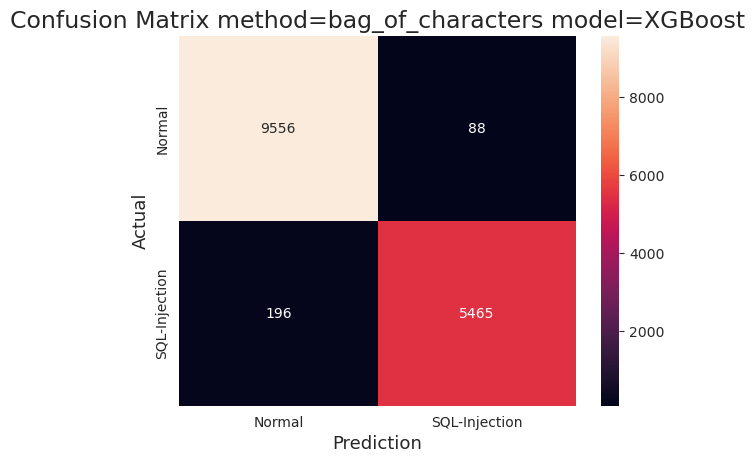

Accuracy: 0.9362
Количество:
• легитимных текстов: 9391
• SQL-инъекций: 4937
• ложных срабатываний: 253
• пропущенных SQL-инъекций: 724


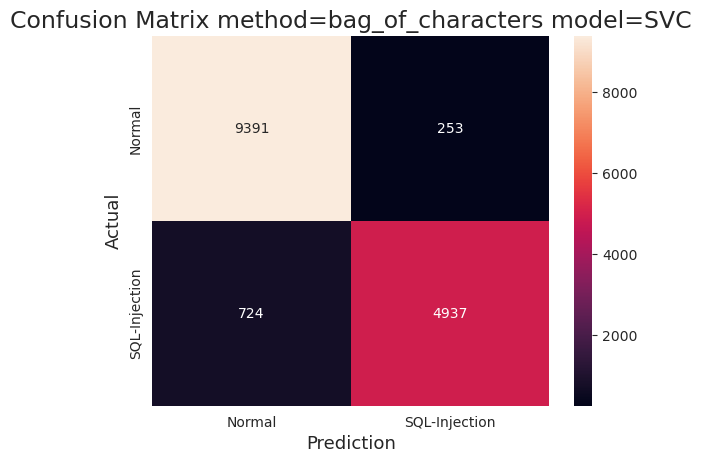

Accuracy: 0.8751
Количество:
• легитимных текстов: 9488
• SQL-инъекций: 3906
• ложных срабатываний: 156
• пропущенных SQL-инъекций: 1755


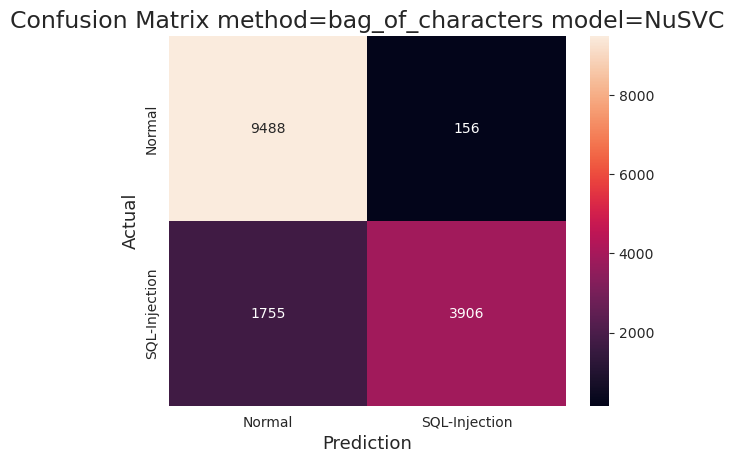

Accuracy: 0.9922
Количество:
• легитимных текстов: 9623
• SQL-инъекций: 5563
• ложных срабатываний: 21
• пропущенных SQL-инъекций: 98


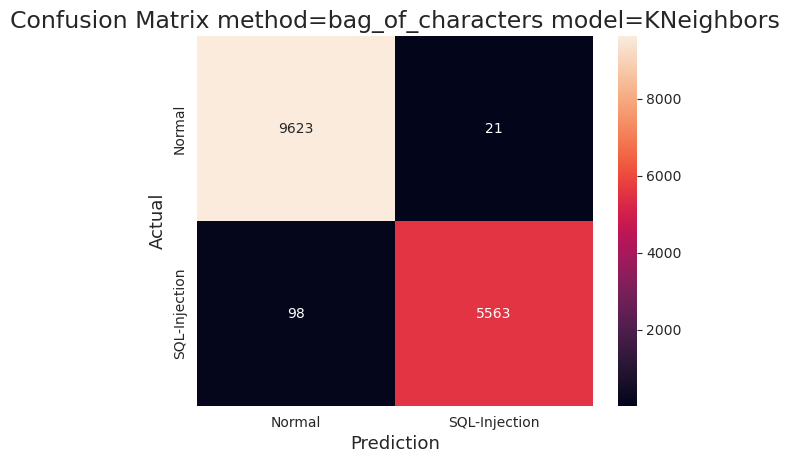

Accuracy: 0.9623
Количество:
• легитимных текстов: 9488
• SQL-инъекций: 5240
• ложных срабатываний: 156
• пропущенных SQL-инъекций: 421


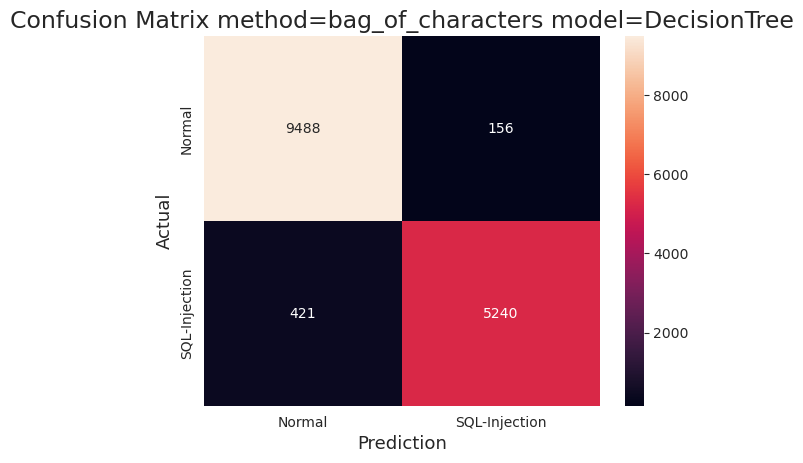

Accuracy: 0.9359
Количество:
• легитимных текстов: 9430
• SQL-инъекций: 4894
• ложных срабатываний: 214
• пропущенных SQL-инъекций: 767


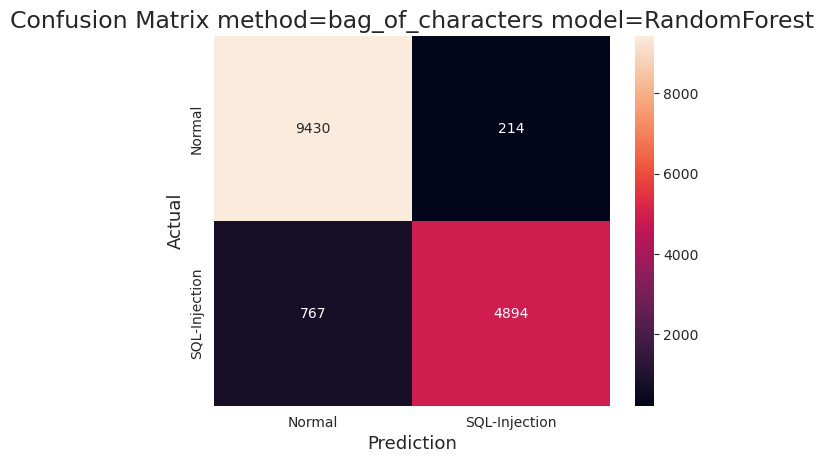

Accuracy: 0.9493
Количество:
• легитимных текстов: 9399
• SQL-инъекций: 5130
• ложных срабатываний: 245
• пропущенных SQL-инъекций: 531


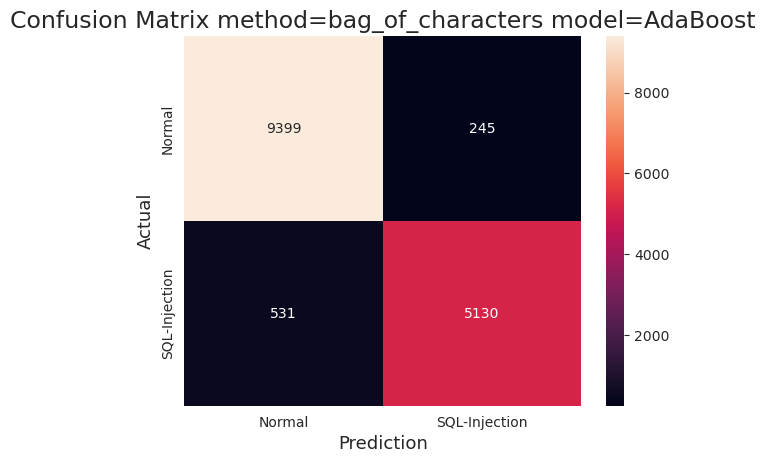

Accuracy: 0.9842
Количество:
• легитимных текстов: 9590
• SQL-инъекций: 5473
• ложных срабатываний: 54
• пропущенных SQL-инъекций: 188


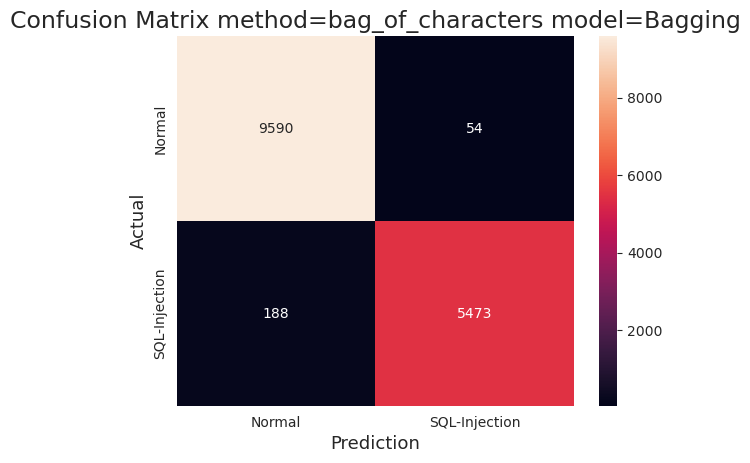

Accuracy: 0.9916
Количество:
• легитимных текстов: 9627
• SQL-инъекций: 5549
• ложных срабатываний: 17
• пропущенных SQL-инъекций: 112


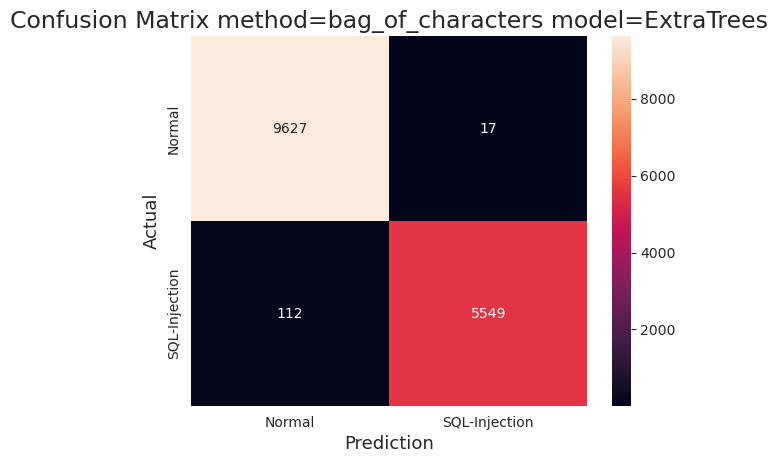

Accuracy: 0.9328
Количество:
• легитимных текстов: 9313
• SQL-инъекций: 4963
• ложных срабатываний: 331
• пропущенных SQL-инъекций: 698


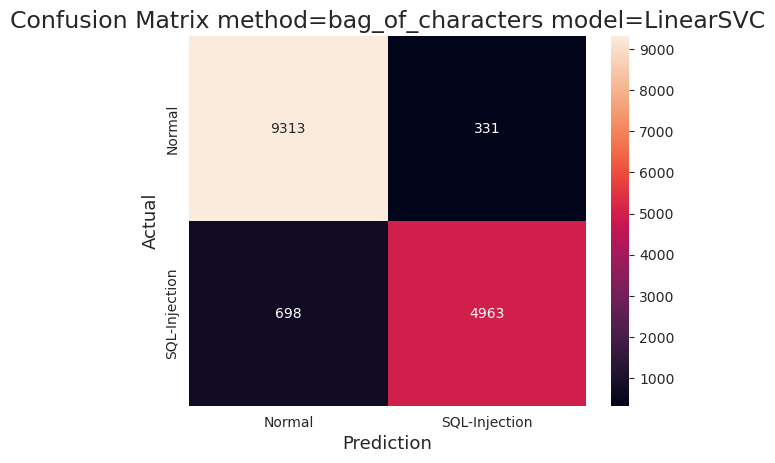

Accuracy: 0.9758
Количество:
• легитимных текстов: 9481
• SQL-инъекций: 5454
• ложных срабатываний: 163
• пропущенных SQL-инъекций: 207


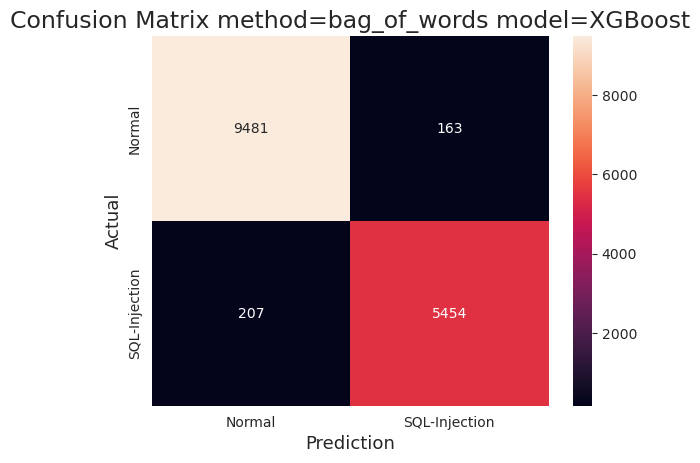

Accuracy: 0.9327
Количество:
• легитимных текстов: 9405
• SQL-инъекций: 4870
• ложных срабатываний: 239
• пропущенных SQL-инъекций: 791


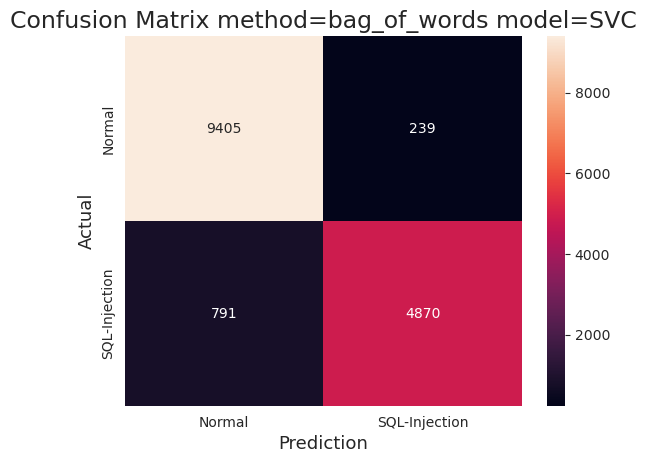

Accuracy: 0.8144
Количество:
• легитимных текстов: 9576
• SQL-инъекций: 2888
• ложных срабатываний: 68
• пропущенных SQL-инъекций: 2773


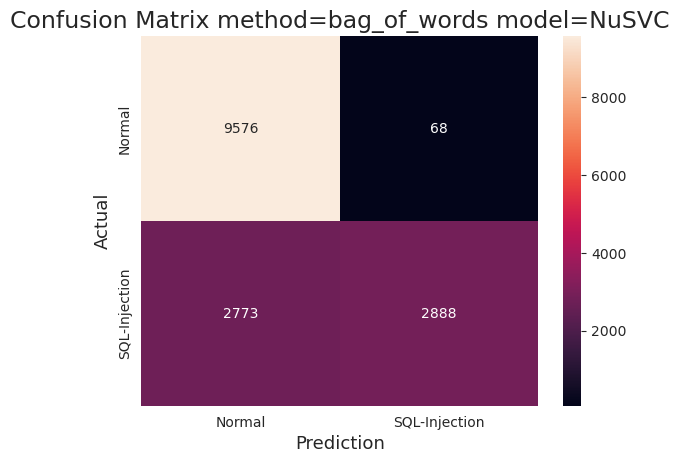

Accuracy: 0.9805
Количество:
• легитимных текстов: 9549
• SQL-инъекций: 5458
• ложных срабатываний: 95
• пропущенных SQL-инъекций: 203


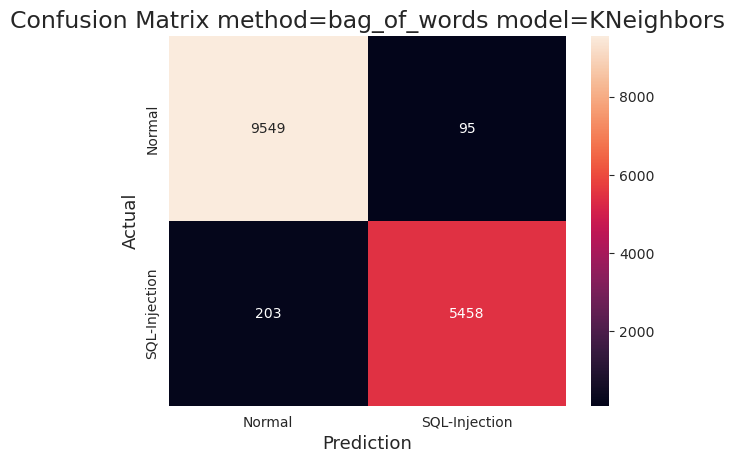

Accuracy: 0.9485
Количество:
• легитимных текстов: 9398
• SQL-инъекций: 5119
• ложных срабатываний: 246
• пропущенных SQL-инъекций: 542


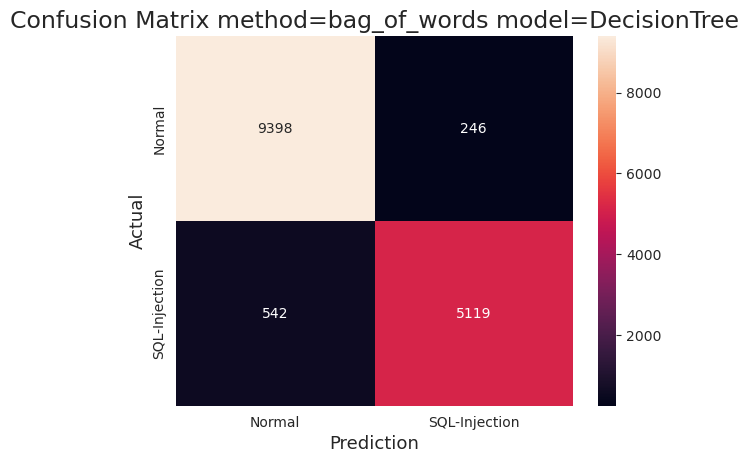

Accuracy: 0.9660
Количество:
• легитимных текстов: 9458
• SQL-инъекций: 5327
• ложных срабатываний: 186
• пропущенных SQL-инъекций: 334


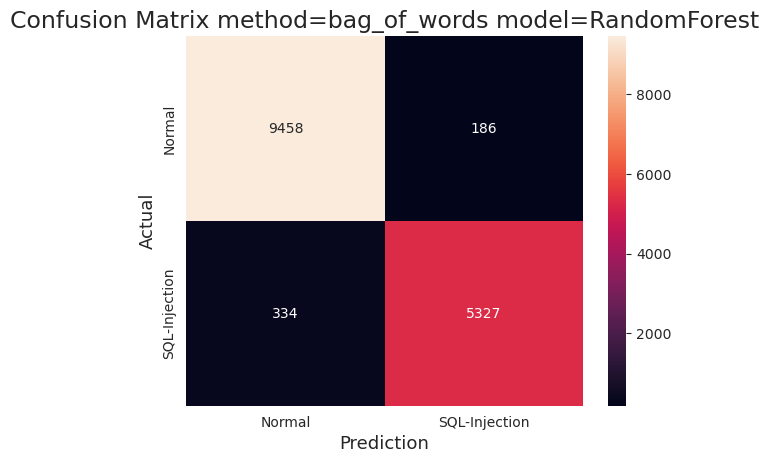

Accuracy: 0.9644
Количество:
• легитимных текстов: 9374
• SQL-инъекций: 5386
• ложных срабатываний: 270
• пропущенных SQL-инъекций: 275


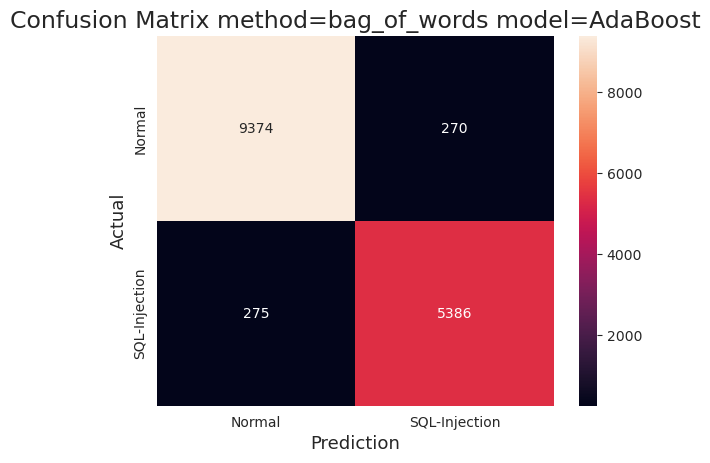

Accuracy: 0.9841
Количество:
• легитимных текстов: 9543
• SQL-инъекций: 5518
• ложных срабатываний: 101
• пропущенных SQL-инъекций: 143


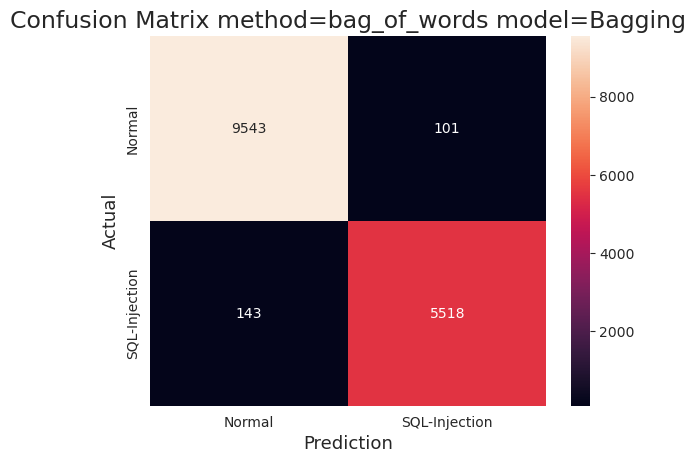

Accuracy: 0.9843
Количество:
• легитимных текстов: 9572
• SQL-инъекций: 5493
• ложных срабатываний: 72
• пропущенных SQL-инъекций: 168


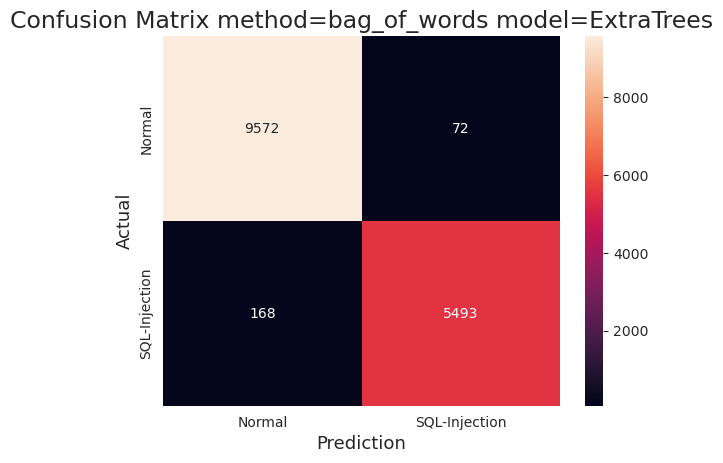

Accuracy: 0.8503
Количество:
• легитимных текстов: 9381
• SQL-инъекций: 3633
• ложных срабатываний: 263
• пропущенных SQL-инъекций: 2028


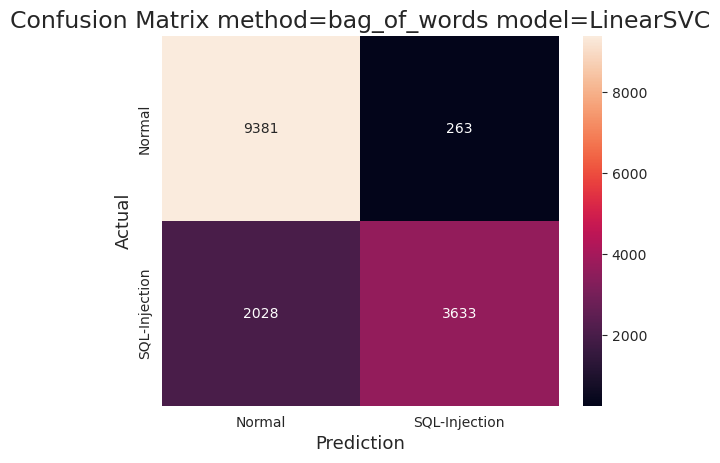

Accuracy: 0.9679
Количество:
• легитимных текстов: 9353
• SQL-инъекций: 5460
• ложных срабатываний: 291
• пропущенных SQL-инъекций: 201


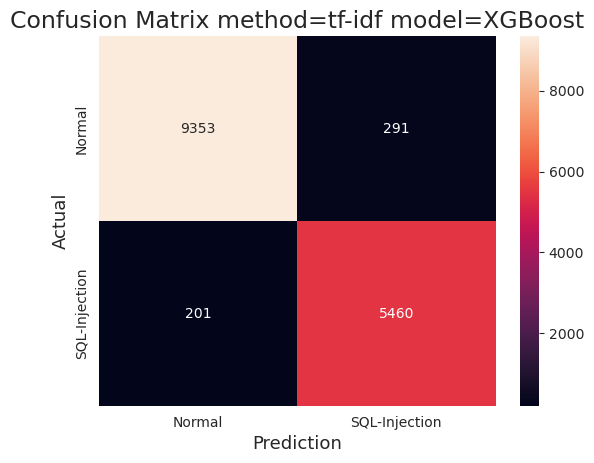

Accuracy: 0.9116
Количество:
• легитимных текстов: 9398
• SQL-инъекций: 4554
• ложных срабатываний: 246
• пропущенных SQL-инъекций: 1107


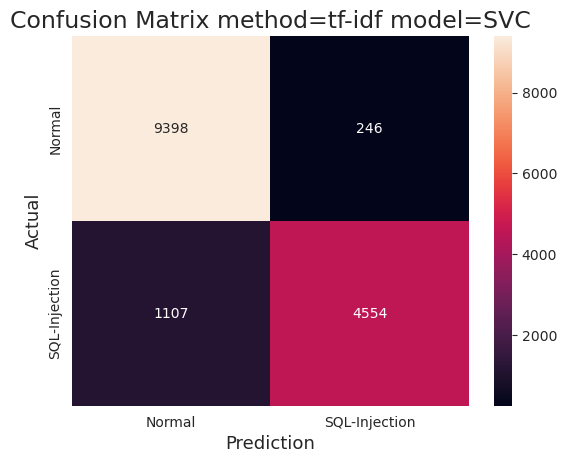

Accuracy: 0.8412
Количество:
• легитимных текстов: 9570
• SQL-инъекций: 3305
• ложных срабатываний: 74
• пропущенных SQL-инъекций: 2356


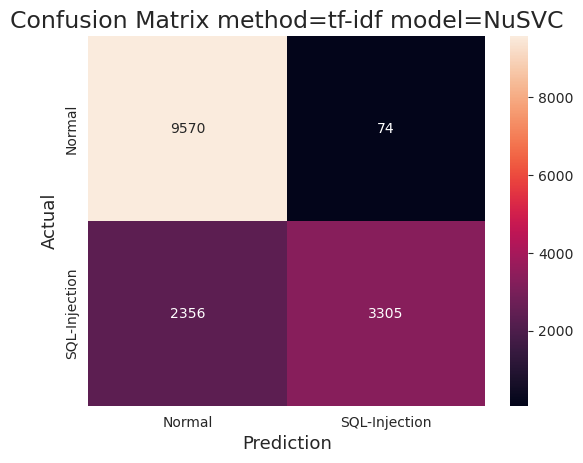

Accuracy: 0.9719
Количество:
• легитимных текстов: 9499
• SQL-инъекций: 5376
• ложных срабатываний: 145
• пропущенных SQL-инъекций: 285


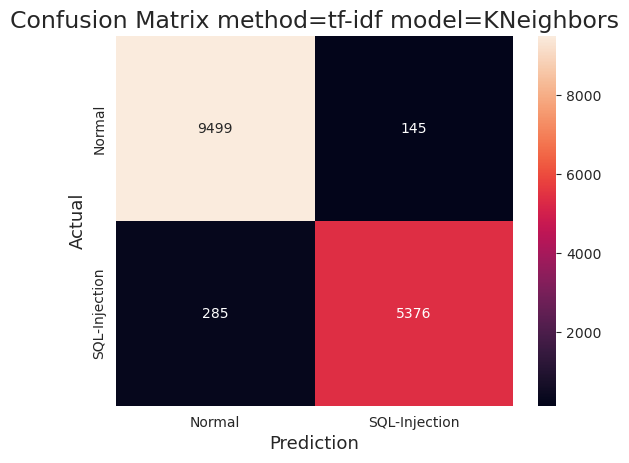

Accuracy: 0.9492
Количество:
• легитимных текстов: 9218
• SQL-инъекций: 5309
• ложных срабатываний: 426
• пропущенных SQL-инъекций: 352


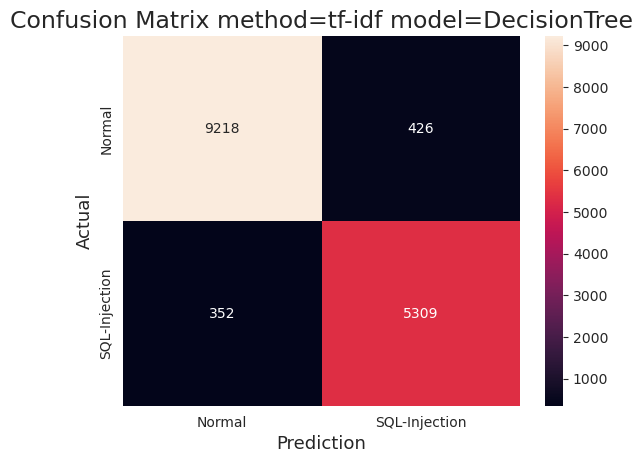

Accuracy: 0.9405
Количество:
• легитимных текстов: 9195
• SQL-инъекций: 5199
• ложных срабатываний: 449
• пропущенных SQL-инъекций: 462


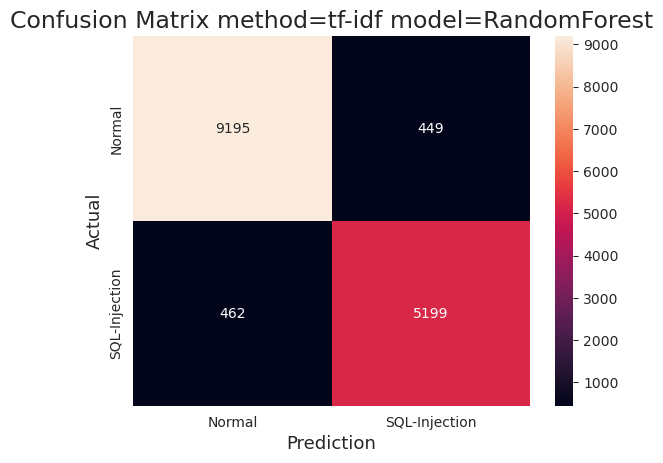

Accuracy: 0.9532
Количество:
• легитимных текстов: 9330
• SQL-инъекций: 5258
• ложных срабатываний: 314
• пропущенных SQL-инъекций: 403


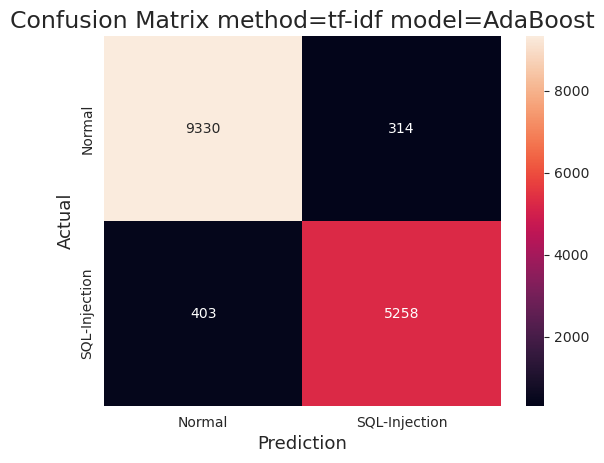

Accuracy: 0.9724
Количество:
• легитимных текстов: 9424
• SQL-инъекций: 5459
• ложных срабатываний: 220
• пропущенных SQL-инъекций: 202


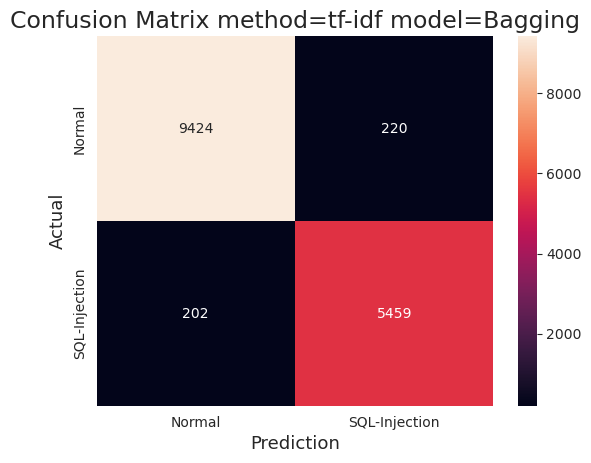

Accuracy: 0.9622
Количество:
• легитимных текстов: 9432
• SQL-инъекций: 5295
• ложных срабатываний: 212
• пропущенных SQL-инъекций: 366


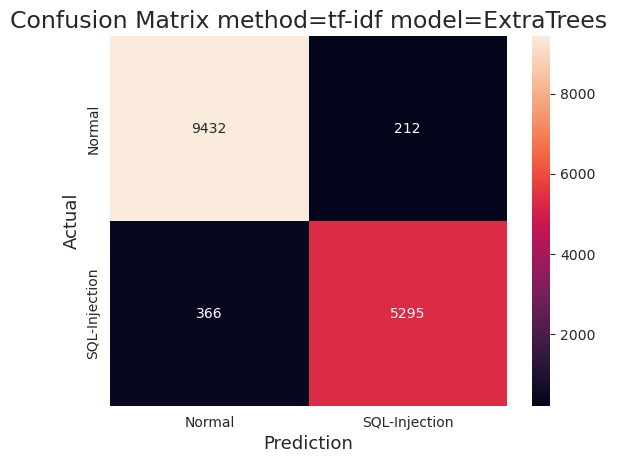

Accuracy: 0.8902
Количество:
• легитимных текстов: 9498
• SQL-инъекций: 4127
• ложных срабатываний: 146
• пропущенных SQL-инъекций: 1534


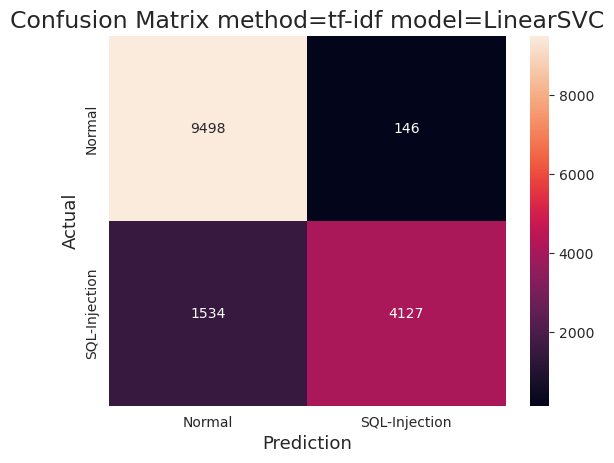

Accuracy: 0.9871
Количество:
• легитимных текстов: 9571
• SQL-инъекций: 5536
• ложных срабатываний: 73
• пропущенных SQL-инъекций: 125


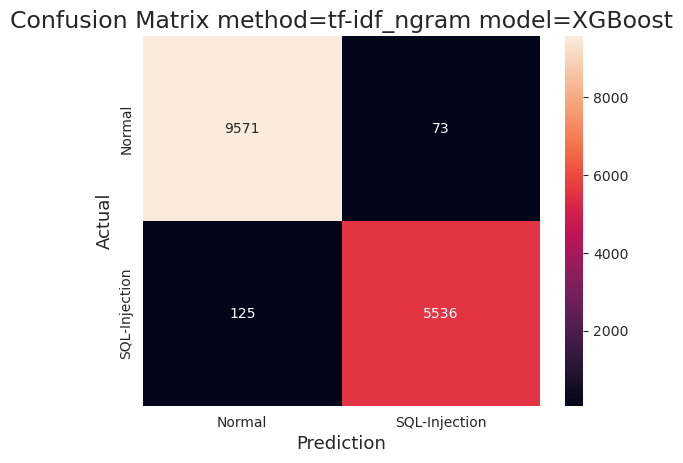

Accuracy: 0.9838
Количество:
• легитимных текстов: 9576
• SQL-инъекций: 5481
• ложных срабатываний: 68
• пропущенных SQL-инъекций: 180


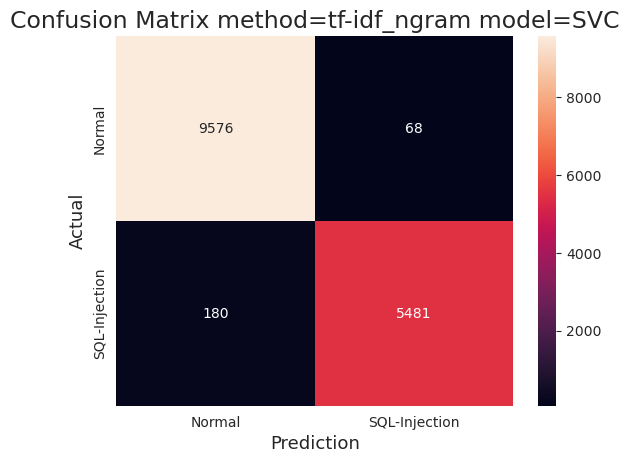

Accuracy: 0.9607
Количество:
• легитимных текстов: 9630
• SQL-инъекций: 5074
• ложных срабатываний: 14
• пропущенных SQL-инъекций: 587


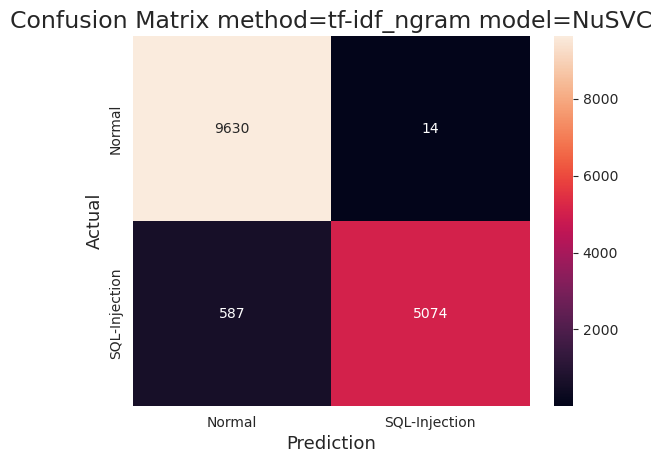

Accuracy: 0.9932
Количество:
• легитимных текстов: 9617
• SQL-инъекций: 5584
• ложных срабатываний: 27
• пропущенных SQL-инъекций: 77


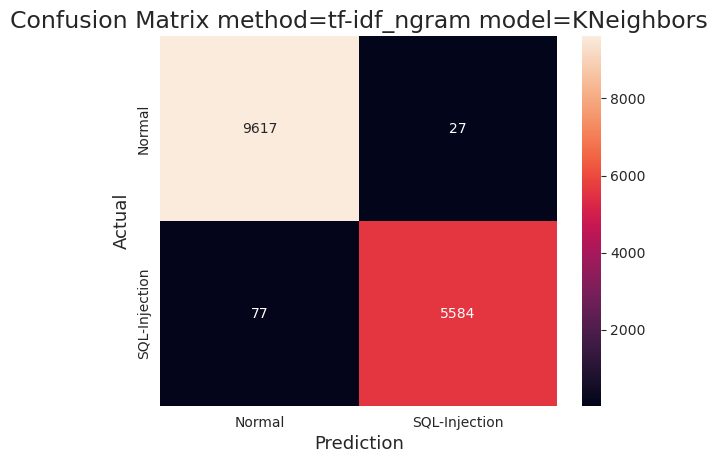

Accuracy: 0.9781
Количество:
• легитимных текстов: 9515
• SQL-инъекций: 5455
• ложных срабатываний: 129
• пропущенных SQL-инъекций: 206


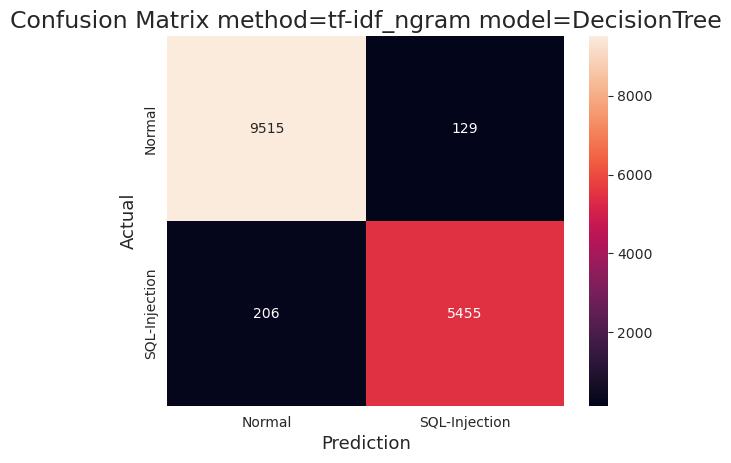

Accuracy: 0.9619
Количество:
• легитимных текстов: 9510
• SQL-инъекций: 5212
• ложных срабатываний: 134
• пропущенных SQL-инъекций: 449


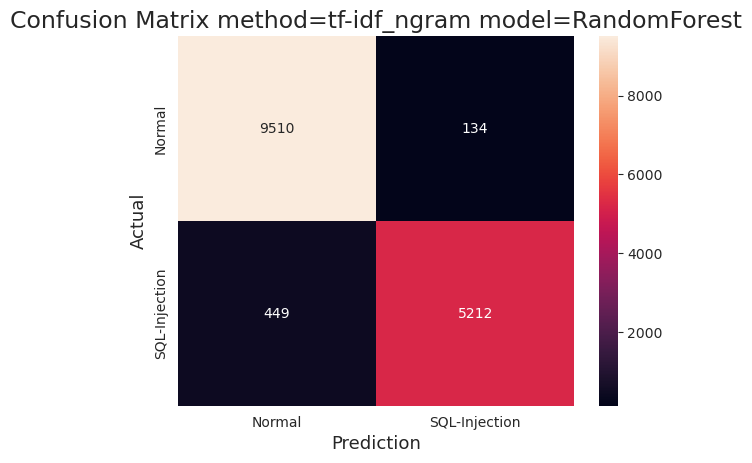

Accuracy: 0.9844
Количество:
• легитимных текстов: 9536
• SQL-инъекций: 5530
• ложных срабатываний: 108
• пропущенных SQL-инъекций: 131


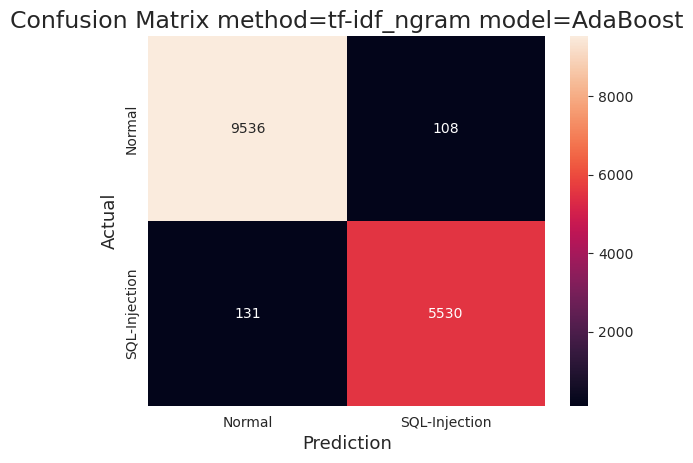

Accuracy: 0.9893
Количество:
• легитимных текстов: 9593
• SQL-инъекций: 5549
• ложных срабатываний: 51
• пропущенных SQL-инъекций: 112


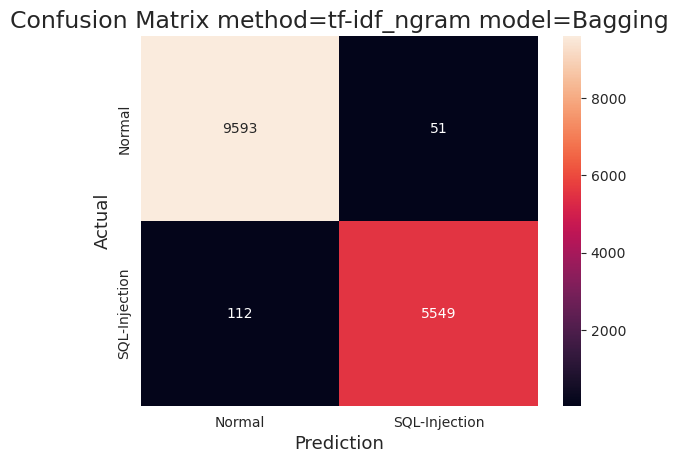

Accuracy: 0.9898
Количество:
• легитимных текстов: 9595
• SQL-инъекций: 5554
• ложных срабатываний: 49
• пропущенных SQL-инъекций: 107


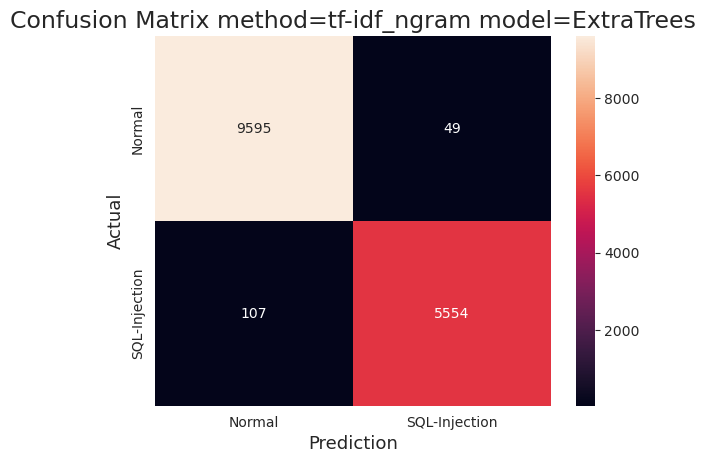

Accuracy: 0.9828
Количество:
• легитимных текстов: 9563
• SQL-инъекций: 5479
• ложных срабатываний: 81
• пропущенных SQL-инъекций: 182


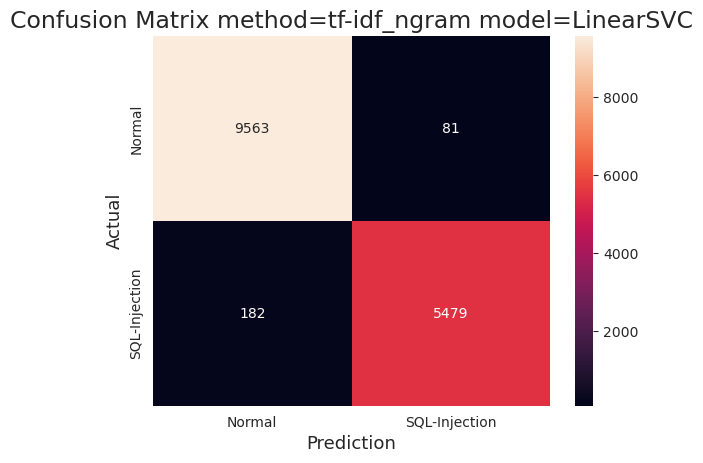

In [23]:
# Применяем обученную модель для предсказания на тестовых данных.
for _method in methods:

    for model_name in models_dict.keys():
        # Прогнозирование на тестовых данных
        y_pred = model[_method][model_name].predict(x_test_model[_method][model_name])

        # Вычисление accuracy Выводим точность
        info_accuracy(y_test, y_pred)

        # Визуализация матрицы ошибок с использованием heatmap
        plot_confusion_matrix(y_expect=y_test, y_pred=y_pred, method=_method, model=model_name)


#### Accuracy — это полезная метрика для измерения общей точности классификатора.
Матрица ошибок позволяет более детально понять, где именно модель ошибается и как она классифицирует объекты по разным классам.

### 6. Загрузим тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

In [24]:
from sklearn.metrics import accuracy_score, classification_report
# Функция для тестирования всех комбинаций моделей и векторизаторов
def test_models_by_vectorizer(x_test_data, y_test_data, _methods, models_to_test):
    results = []
    # Перебираем все методы векторизации
    for vectorizer_method in _methods:
        # Получаем объект векторизатора
        vectorizer = extractors[vectorizer_method]

        # Преобразуем данные
        x_test_vect = vectorizer.extract_features(x_test_data)
        # x_test_reduced_vect тестовые данные, которые будут преобразованы с помощью векторизатора (vectorizer) и подвергнуты снижению размерности
        x_test_reduced_vect = selectors[vectorizer_method].fit_transform(x_test_vect, y_test_data)
        # Перебираем все модели
        for _model_name in models_to_test.keys():
            print(f"Метод векторизации {vectorizer_method} Модель {_model_name}")
            # выбор признаков (feature selection) с использованием заранее обученной модели для тестового набора данных, полученного после векторизации.
            x_test_vect_model = selector[vectorizer_method][_model_name].transform(x_test_reduced_vect)
            # предсказания на основе модели, используя данные, которые прошли через выбор признаков (или другие трансформации)
            y_pred_data = model[vectorizer_method][_model_name].predict(x_test_vect_model)
            #y_pred_data = classifier[vectorizer_method][_model_name].predict(x_test_reduced_vect)

            # Оцениваем производительность модели
            info_accuracy(y_test_data, y_pred_data)

            # Визуализация матрицы ошибок с использованием heatmap
            plot_confusion_matrix(y_expect=y_test_data, y_pred=y_pred_data, method=vectorizer_method, model=_model_name)

            # Сохраняем результаты
            results.append({
                "vectorizer": vectorizer_method,
                "model": models_to_test[_model_name],
                "accuracy": accuracy_score(y_test_data, y_pred_data),
                "report": classification_report(y_test_data, y_pred_data, output_dict=True),
            })

    return pd.DataFrame(results)

In [25]:
test_df = pd.read_csv('datasets/test-dataset.csv')
test_x = test_df['payload'].values
test_y = test_df['label'].values

Метод векторизации bag_of_characters Модель XGBoost
Accuracy: 0.6001
Количество:
• легитимных текстов: 13037
• SQL-инъекций: 5060
• ложных срабатываний: 6267
• пропущенных SQL-инъекций: 5792


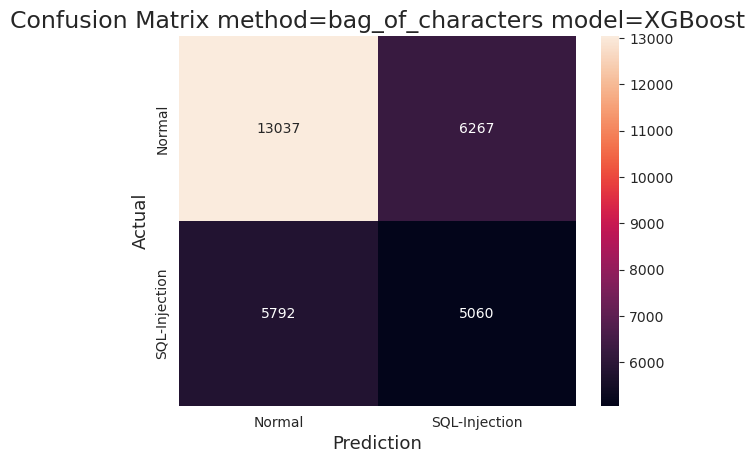

Метод векторизации bag_of_characters Модель SVC
Accuracy: 0.6306
Количество:
• легитимных текстов: 15243
• SQL-инъекций: 3774
• ложных срабатываний: 4061
• пропущенных SQL-инъекций: 7078


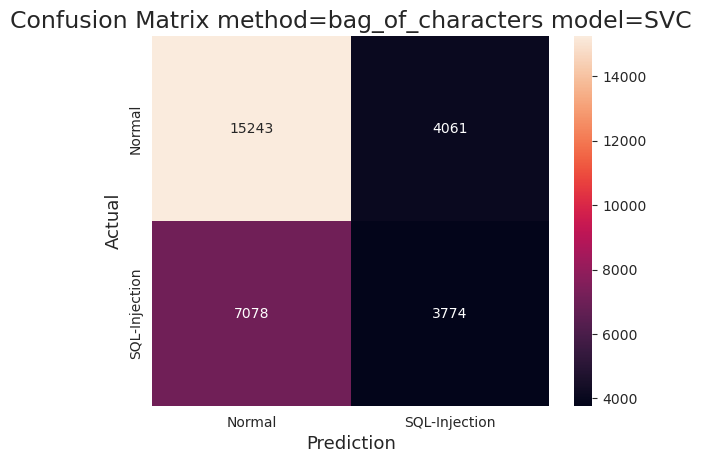

Метод векторизации bag_of_characters Модель NuSVC
Accuracy: 0.7491
Количество:
• легитимных текстов: 17813
• SQL-инъекций: 4776
• ложных срабатываний: 1491
• пропущенных SQL-инъекций: 6076


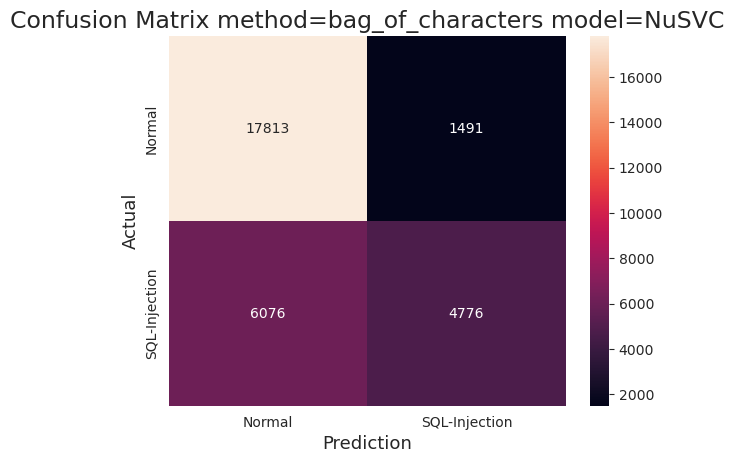

Метод векторизации bag_of_characters Модель KNeighbors
Accuracy: 0.6789
Количество:
• легитимных текстов: 14315
• SQL-инъекций: 6159
• ложных срабатываний: 4989
• пропущенных SQL-инъекций: 4693


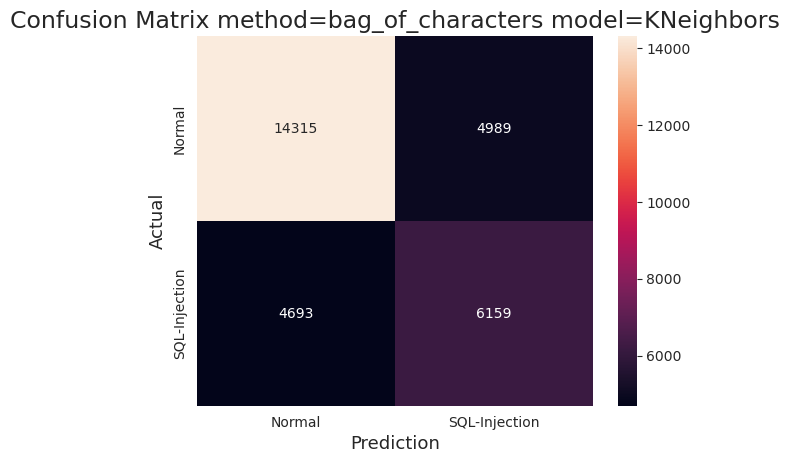

Метод векторизации bag_of_characters Модель DecisionTree
Accuracy: 0.5741
Количество:
• легитимных текстов: 11858
• SQL-инъекций: 5456
• ложных срабатываний: 7446
• пропущенных SQL-инъекций: 5396


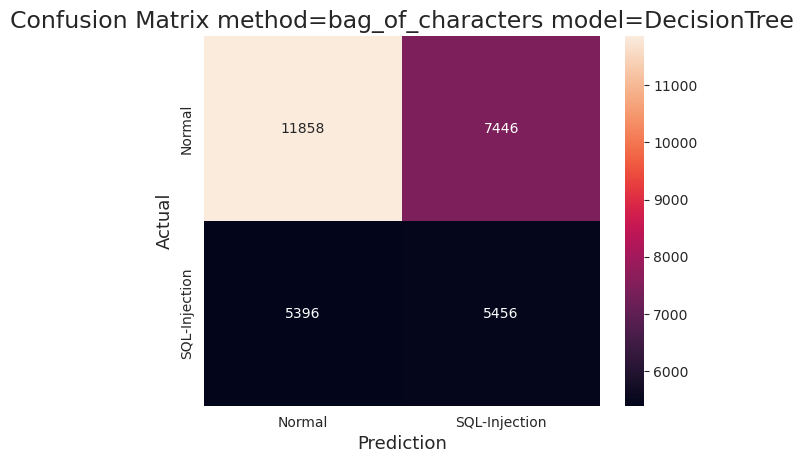

Метод векторизации bag_of_characters Модель RandomForest
Accuracy: 0.7119
Количество:
• легитимных текстов: 16397
• SQL-инъекций: 5072
• ложных срабатываний: 2907
• пропущенных SQL-инъекций: 5780


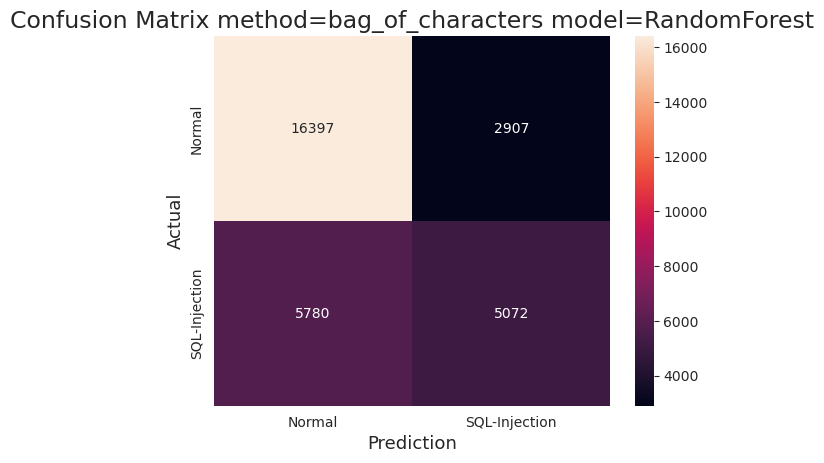

Метод векторизации bag_of_characters Модель AdaBoost
Accuracy: 0.6703
Количество:
• легитимных текстов: 14972
• SQL-инъекций: 5241
• ложных срабатываний: 4332
• пропущенных SQL-инъекций: 5611


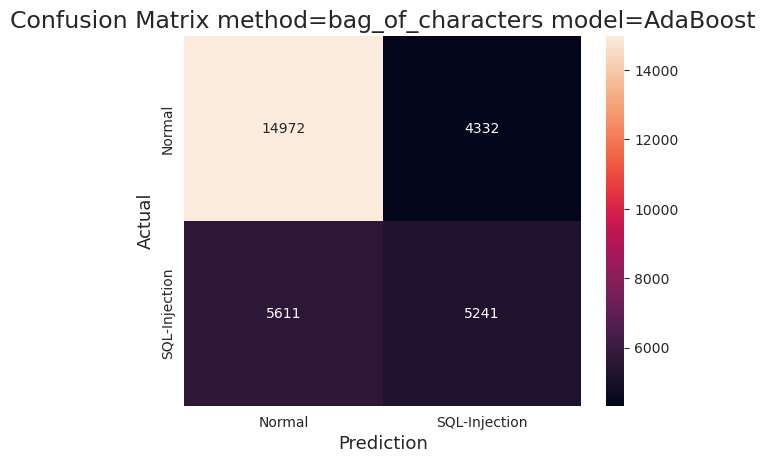

Метод векторизации bag_of_characters Модель Bagging
Accuracy: 0.6230
Количество:
• легитимных текстов: 13531
• SQL-инъекций: 5257
• ложных срабатываний: 5773
• пропущенных SQL-инъекций: 5595


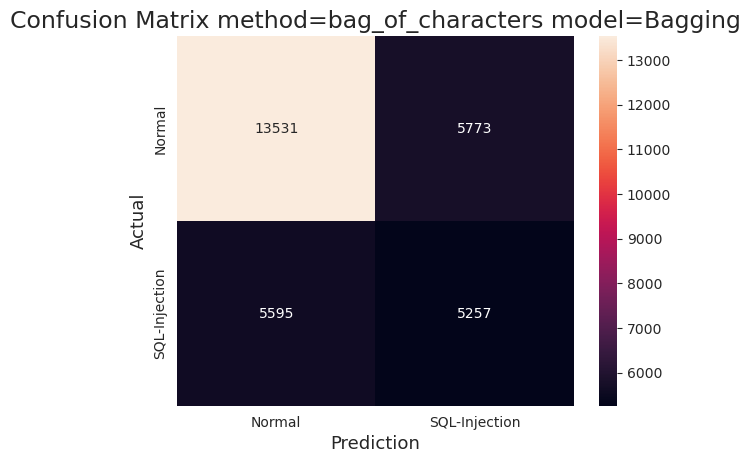

Метод векторизации bag_of_characters Модель ExtraTrees
Accuracy: 0.7037
Количество:
• легитимных текстов: 14404
• SQL-инъекций: 6817
• ложных срабатываний: 4900
• пропущенных SQL-инъекций: 4035


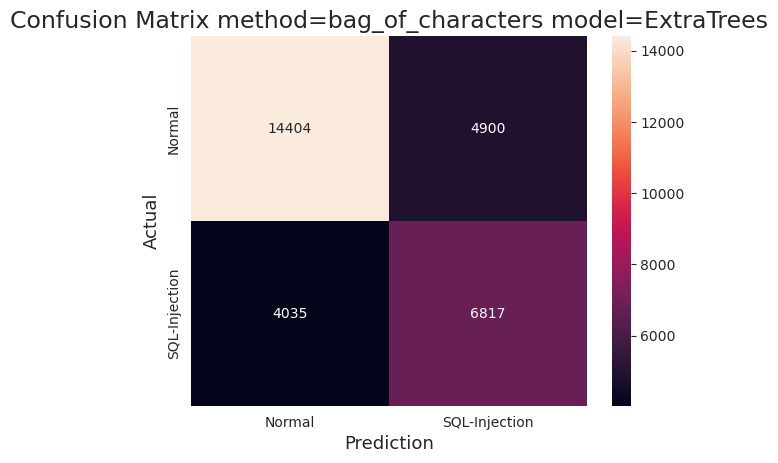

Метод векторизации bag_of_characters Модель LinearSVC
Accuracy: 0.7518
Количество:
• легитимных текстов: 16697
• SQL-инъекций: 5975
• ложных срабатываний: 2607
• пропущенных SQL-инъекций: 4877


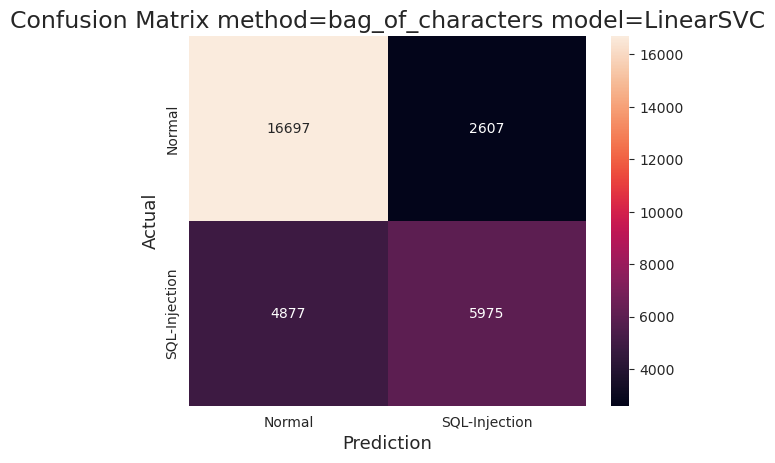

Метод векторизации bag_of_words Модель XGBoost
Accuracy: 0.9403
Количество:
• легитимных текстов: 19051
• SQL-инъекций: 9306
• ложных срабатываний: 253
• пропущенных SQL-инъекций: 1546


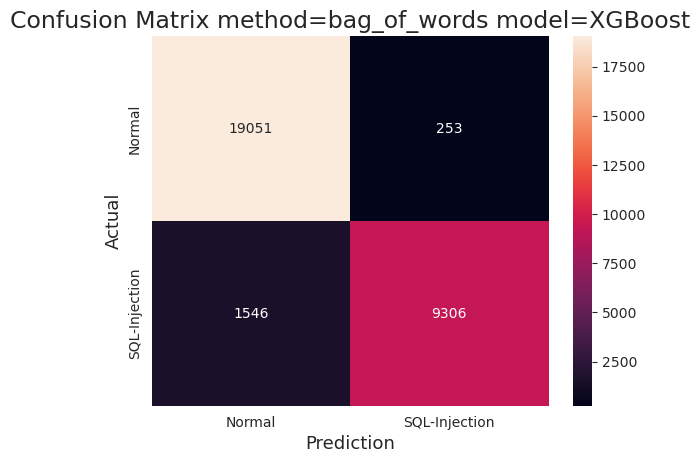

Метод векторизации bag_of_words Модель SVC
Accuracy: 0.7809
Количество:
• легитимных текстов: 19140
• SQL-инъекций: 4409
• ложных срабатываний: 164
• пропущенных SQL-инъекций: 6443


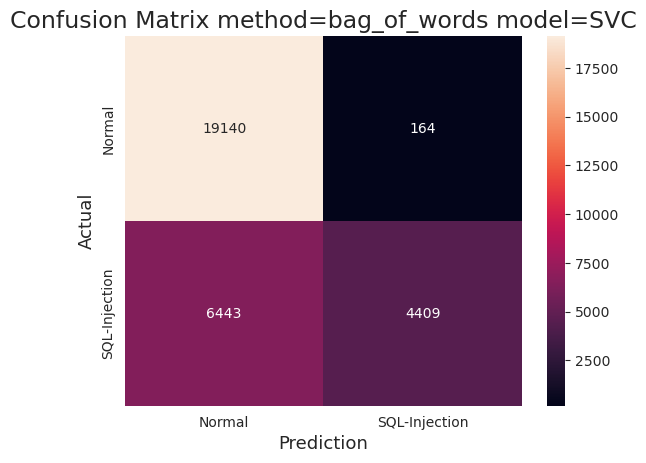

Метод векторизации bag_of_words Модель NuSVC
Accuracy: 0.7354
Количество:
• легитимных текстов: 19262
• SQL-инъекций: 2914
• ложных срабатываний: 42
• пропущенных SQL-инъекций: 7938


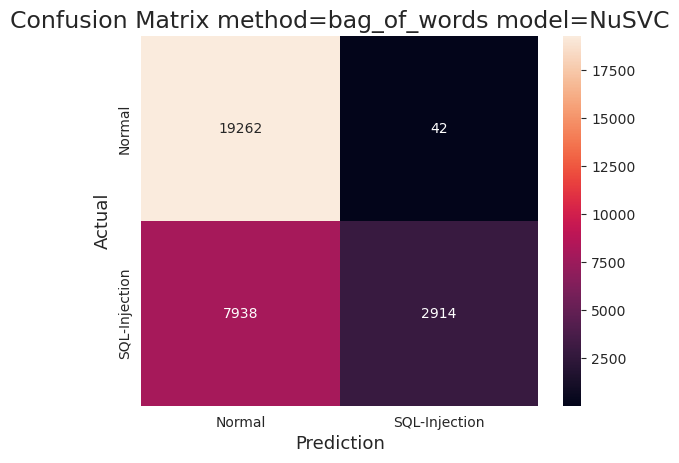

Метод векторизации bag_of_words Модель KNeighbors
Accuracy: 0.8830
Количество:
• легитимных текстов: 19126
• SQL-инъекций: 7501
• ложных срабатываний: 178
• пропущенных SQL-инъекций: 3351


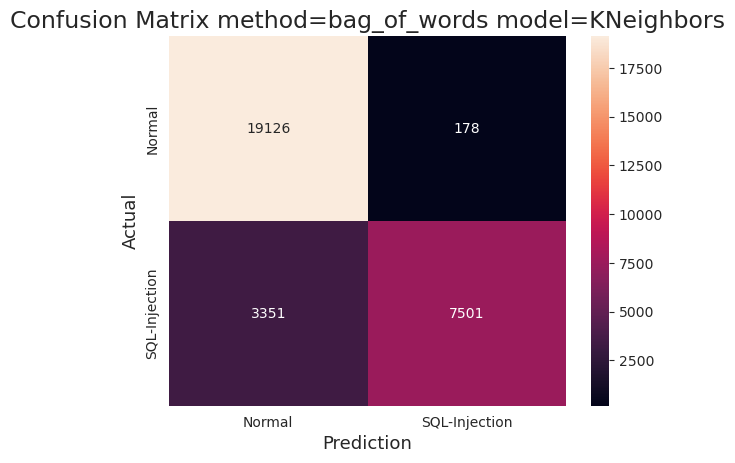

Метод векторизации bag_of_words Модель DecisionTree
Accuracy: 0.9322
Количество:
• легитимных текстов: 19061
• SQL-инъекций: 9051
• ложных срабатываний: 243
• пропущенных SQL-инъекций: 1801


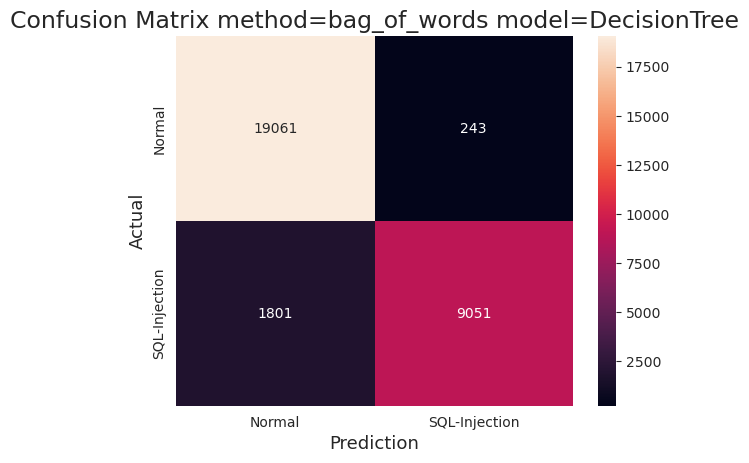

Метод векторизации bag_of_words Модель RandomForest
Accuracy: 0.8118
Количество:
• легитимных текстов: 19191
• SQL-инъекций: 5291
• ложных срабатываний: 113
• пропущенных SQL-инъекций: 5561


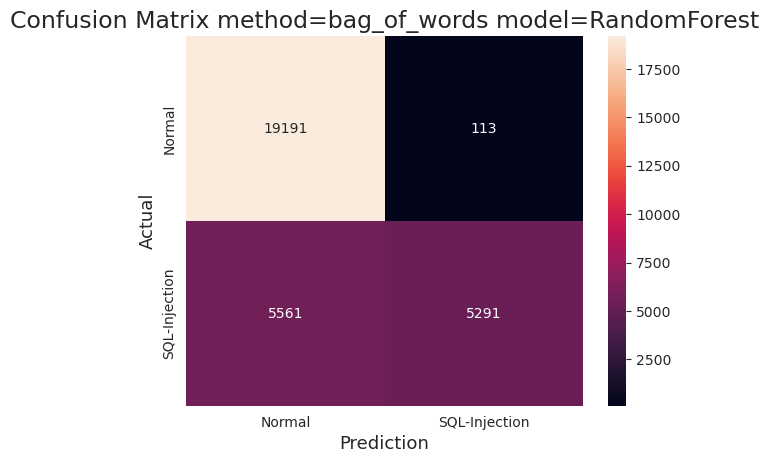

Метод векторизации bag_of_words Модель AdaBoost
Accuracy: 0.8892
Количество:
• легитимных текстов: 19142
• SQL-инъекций: 7674
• ложных срабатываний: 162
• пропущенных SQL-инъекций: 3178


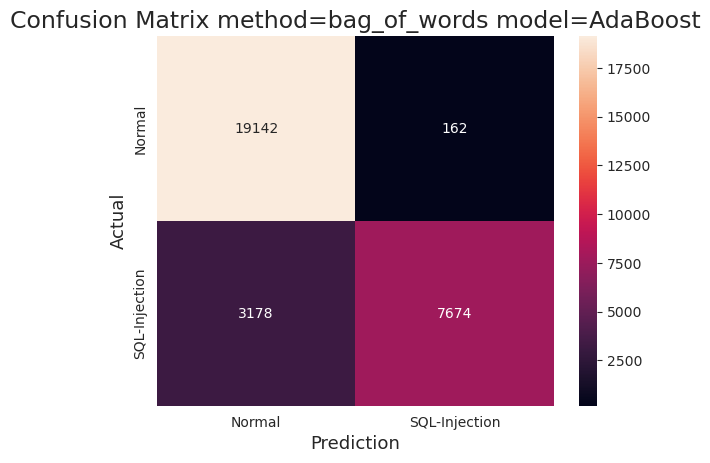

Метод векторизации bag_of_words Модель Bagging
Accuracy: 0.9380
Количество:
• легитимных текстов: 19101
• SQL-инъекций: 9184
• ложных срабатываний: 203
• пропущенных SQL-инъекций: 1668


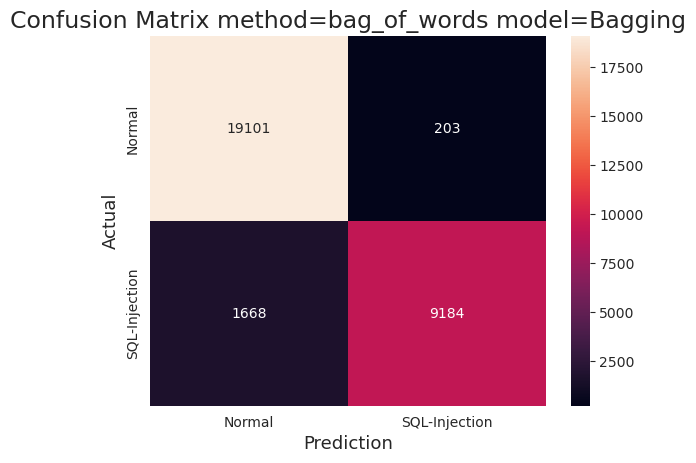

Метод векторизации bag_of_words Модель ExtraTrees
Accuracy: 0.9046
Количество:
• легитимных текстов: 18428
• SQL-инъекций: 8851
• ложных срабатываний: 876
• пропущенных SQL-инъекций: 2001


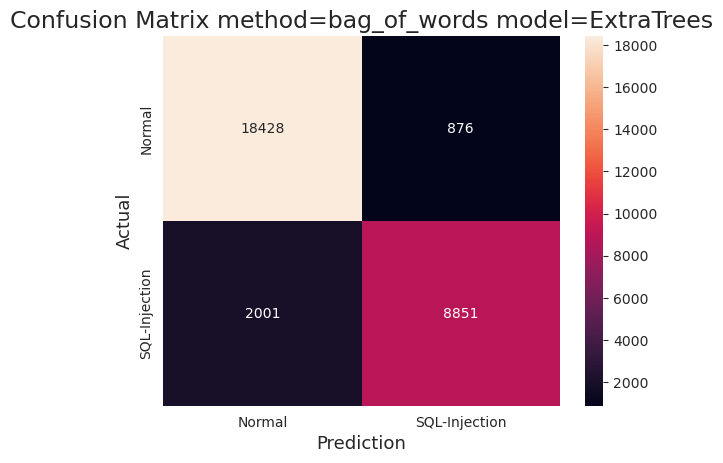

Метод векторизации bag_of_words Модель LinearSVC
Accuracy: 0.7705
Количество:
• легитимных текстов: 19230
• SQL-инъекций: 4004
• ложных срабатываний: 74
• пропущенных SQL-инъекций: 6848


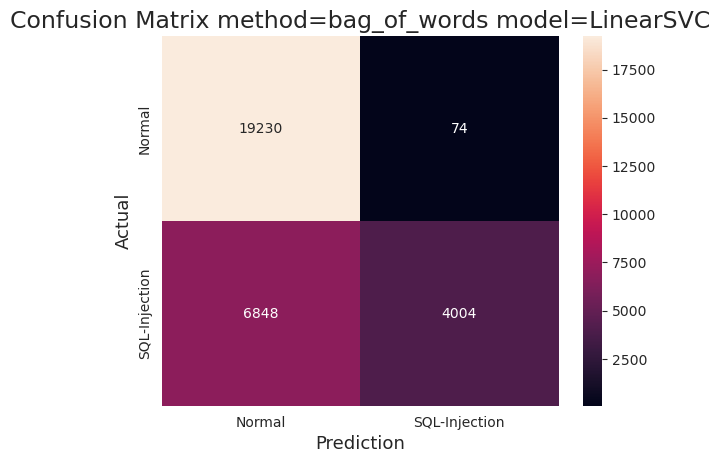

Метод векторизации tf-idf Модель XGBoost
Accuracy: 0.9118
Количество:
• легитимных текстов: 18313
• SQL-инъекций: 9184
• ложных срабатываний: 991
• пропущенных SQL-инъекций: 1668


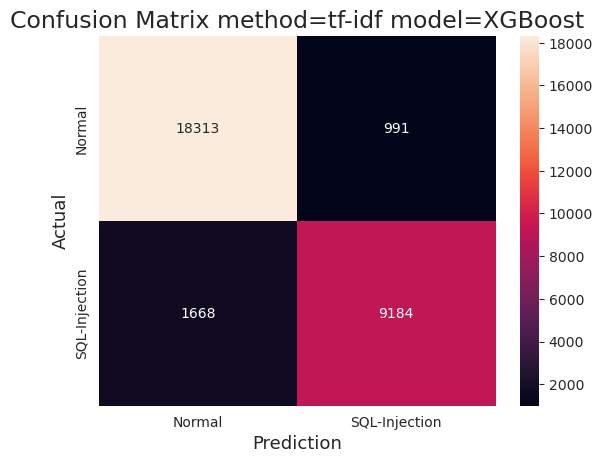

Метод векторизации tf-idf Модель SVC
Accuracy: 0.6912
Количество:
• легитимных текстов: 19210
• SQL-инъекций: 1635
• ложных срабатываний: 94
• пропущенных SQL-инъекций: 9217


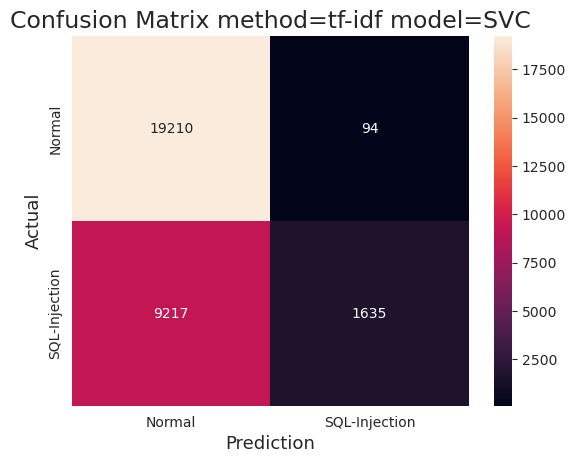

Метод векторизации tf-idf Модель NuSVC
Accuracy: 0.6824
Количество:
• легитимных текстов: 19287
• SQL-инъекций: 1290
• ложных срабатываний: 17
• пропущенных SQL-инъекций: 9562


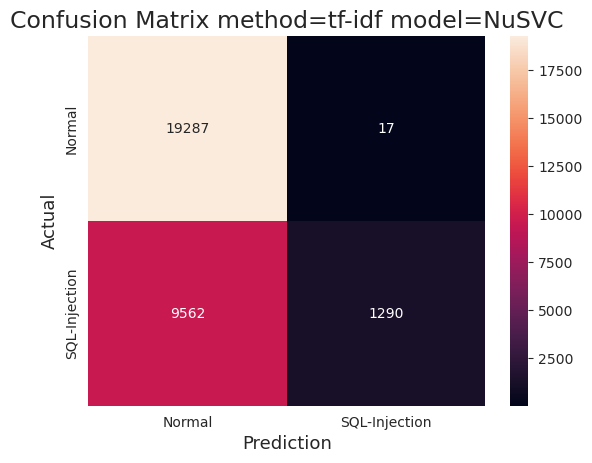

Метод векторизации tf-idf Модель KNeighbors
Accuracy: 0.7146
Количество:
• легитимных текстов: 18284
• SQL-инъекций: 3264
• ложных срабатываний: 1020
• пропущенных SQL-инъекций: 7588


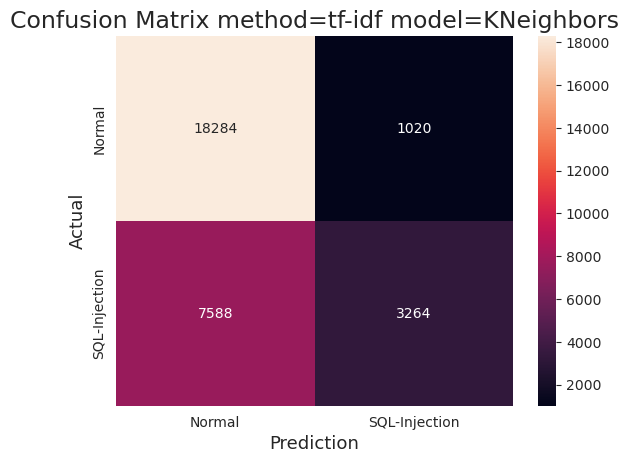

Метод векторизации tf-idf Модель DecisionTree
Accuracy: 0.8984
Количество:
• легитимных текстов: 18236
• SQL-инъекций: 8855
• ложных срабатываний: 1068
• пропущенных SQL-инъекций: 1997


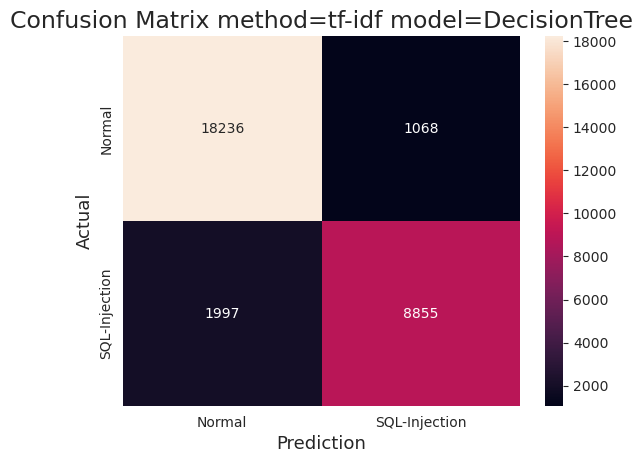

Метод векторизации tf-idf Модель RandomForest
Accuracy: 0.9381
Количество:
• легитимных текстов: 19045
• SQL-инъекций: 9243
• ложных срабатываний: 259
• пропущенных SQL-инъекций: 1609


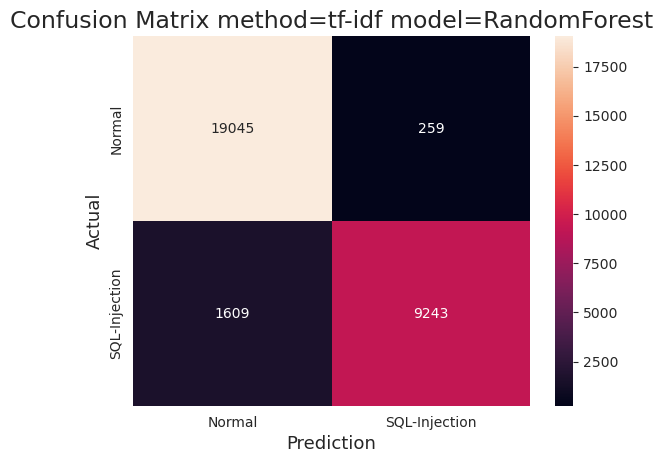

Метод векторизации tf-idf Модель AdaBoost
Accuracy: 0.7971
Количество:
• легитимных текстов: 19120
• SQL-инъекций: 4918
• ложных срабатываний: 184
• пропущенных SQL-инъекций: 5934


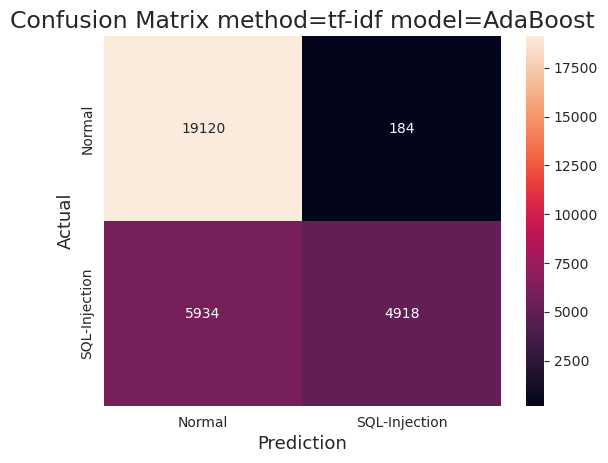

Метод векторизации tf-idf Модель Bagging
Accuracy: 0.7987
Количество:
• легитимных текстов: 18275
• SQL-инъекций: 5811
• ложных срабатываний: 1029
• пропущенных SQL-инъекций: 5041


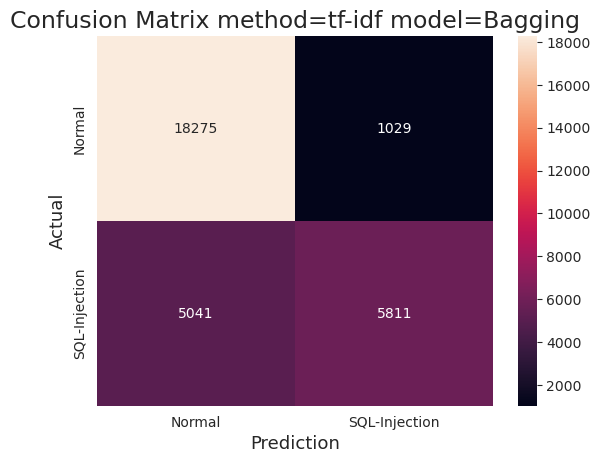

Метод векторизации tf-idf Модель ExtraTrees
Accuracy: 0.8725
Количество:
• легитимных текстов: 19122
• SQL-инъекций: 7188
• ложных срабатываний: 182
• пропущенных SQL-инъекций: 3664


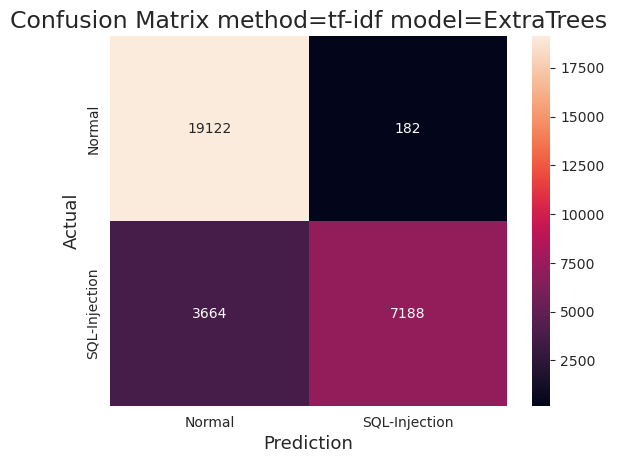

Метод векторизации tf-idf Модель LinearSVC
Accuracy: 0.6868
Количество:
• легитимных текстов: 19284
• SQL-инъекций: 1426
• ложных срабатываний: 20
• пропущенных SQL-инъекций: 9426


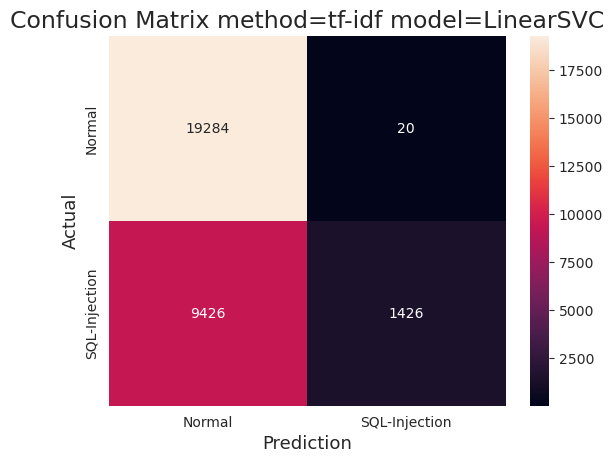

Метод векторизации tf-idf_ngram Модель XGBoost
Accuracy: 0.6220
Количество:
• легитимных текстов: 11419
• SQL-инъекций: 7337
• ложных срабатываний: 7885
• пропущенных SQL-инъекций: 3515


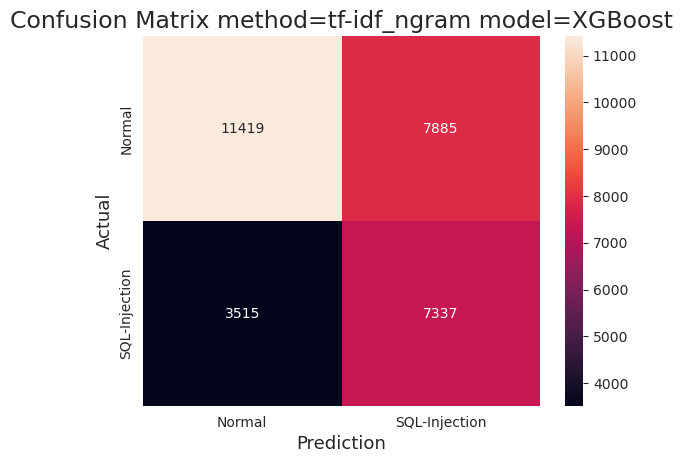

Метод векторизации tf-idf_ngram Модель SVC
Accuracy: 0.8974
Количество:
• легитимных текстов: 19200
• SQL-инъекций: 7862
• ложных срабатываний: 104
• пропущенных SQL-инъекций: 2990


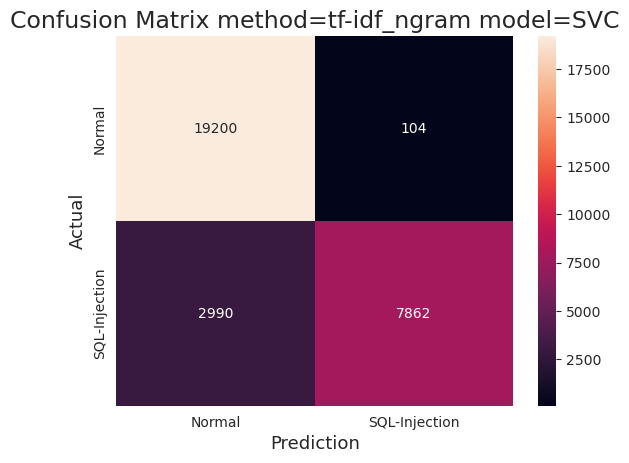

Метод векторизации tf-idf_ngram Модель NuSVC
Accuracy: 0.7982
Количество:
• легитимных текстов: 19292
• SQL-инъекций: 4780
• ложных срабатываний: 12
• пропущенных SQL-инъекций: 6072


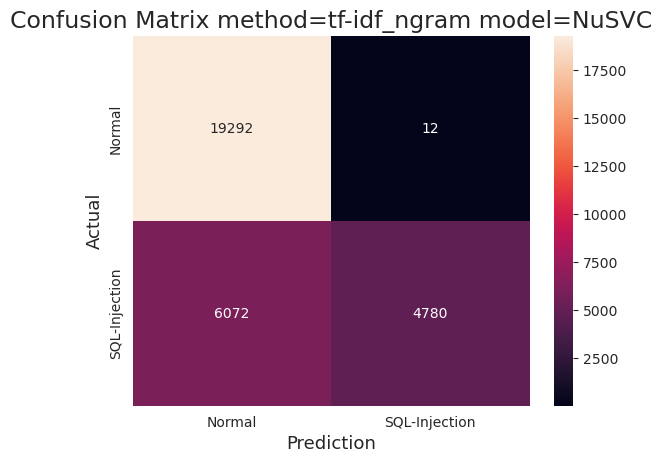

Метод векторизации tf-idf_ngram Модель KNeighbors
Accuracy: 0.6541
Количество:
• легитимных текстов: 12449
• SQL-инъекций: 7275
• ложных срабатываний: 6855
• пропущенных SQL-инъекций: 3577


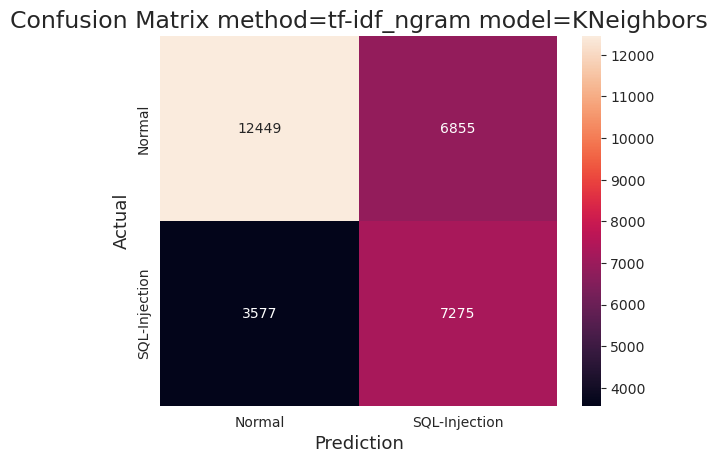

Метод векторизации tf-idf_ngram Модель DecisionTree
Accuracy: 0.8414
Количество:
• легитимных текстов: 19114
• SQL-инъекций: 6258
• ложных срабатываний: 190
• пропущенных SQL-инъекций: 4594


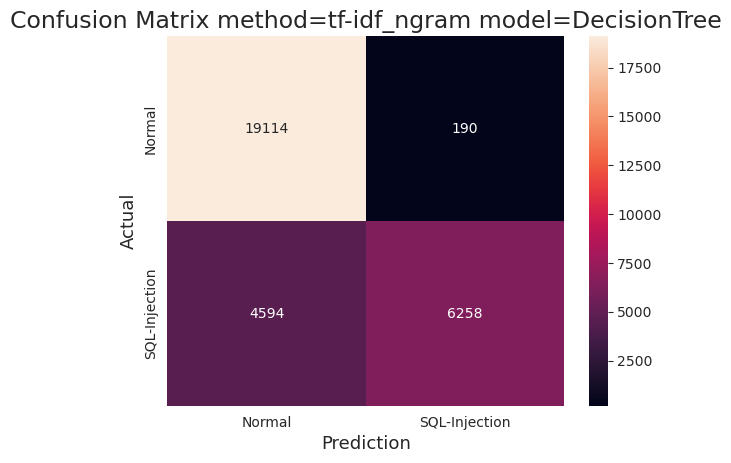

Метод векторизации tf-idf_ngram Модель RandomForest
Accuracy: 0.8238
Количество:
• легитимных текстов: 17972
• SQL-инъекций: 6872
• ложных срабатываний: 1332
• пропущенных SQL-инъекций: 3980


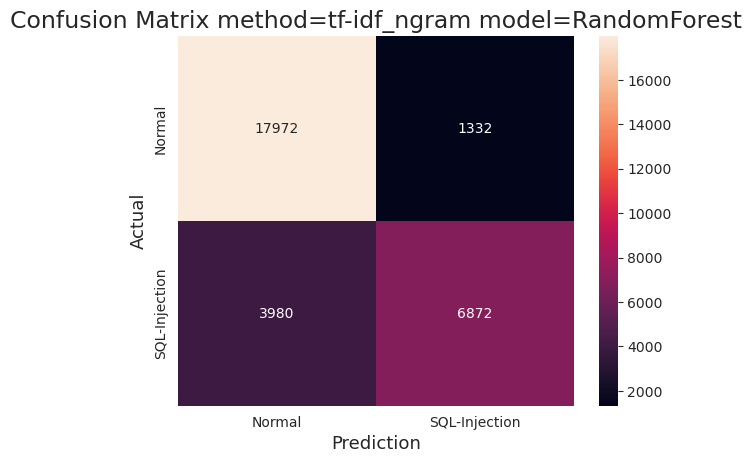

Метод векторизации tf-idf_ngram Модель AdaBoost
Accuracy: 0.8634
Количество:
• легитимных текстов: 19012
• SQL-инъекций: 7024
• ложных срабатываний: 292
• пропущенных SQL-инъекций: 3828


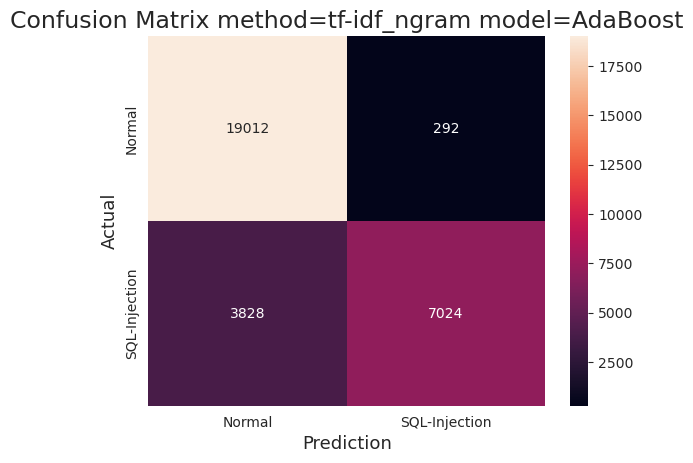

Метод векторизации tf-idf_ngram Модель Bagging
Accuracy: 0.4755
Количество:
• легитимных текстов: 6531
• SQL-инъекций: 7809
• ложных срабатываний: 12773
• пропущенных SQL-инъекций: 3043


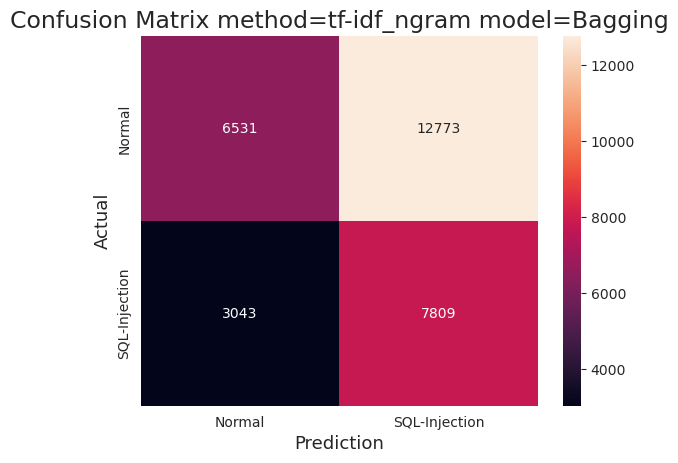

Метод векторизации tf-idf_ngram Модель ExtraTrees
Accuracy: 0.8473
Количество:
• легитимных текстов: 18162
• SQL-инъекций: 7389
• ложных срабатываний: 1142
• пропущенных SQL-инъекций: 3463


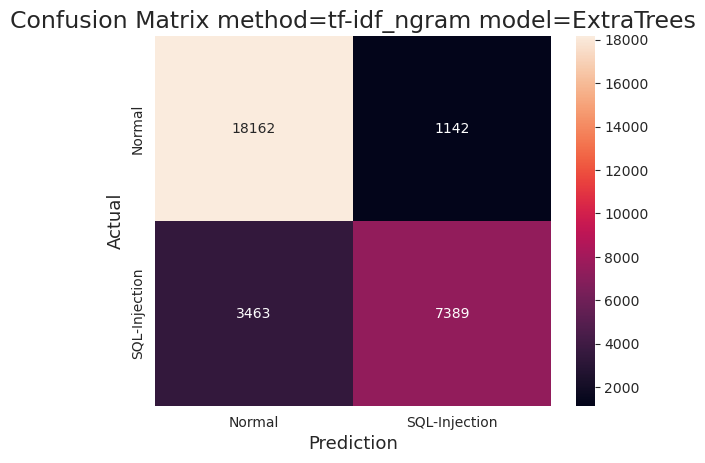

Метод векторизации tf-idf_ngram Модель LinearSVC
Accuracy: 0.9003
Количество:
• легитимных текстов: 19193
• SQL-инъекций: 7957
• ложных срабатываний: 111
• пропущенных SQL-инъекций: 2895


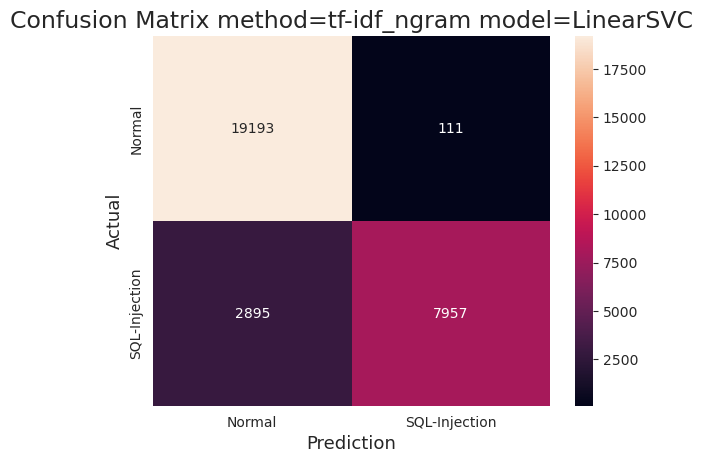

In [26]:
results_df = test_models_by_vectorizer(test_x, test_y, methods, models_dict)

### 7. Выбор модели

In [27]:
with pd.option_context("display.max_colwidth", 500):
    display(results_df.sort_values(by="accuracy", ascending=False).head())

,vectorizer,model,accuracy,report
10,bag_of_words,XGBoost,0.940344,"{'0': {'precision': 0.9249405253192212, 'recall': 0.9868939079983423, 'f1-score': 0.9549134106914614, 'support': 19304.0}, '1': {'precision': 0.9735327963176065, 'recall': 0.8575377810541835, 'f1-score': 0.9118612512860712, 'support': 10852.0}, 'accuracy': 0.9403435468895079, 'macro avg': {'precision': 0.9492366608184138, 'recall': 0.9222158445262629, 'f1-score': 0.9333873309887664, 'support': 30156.0}, 'weighted avg': {'precision': 0.9424270396074053, 'recall': 0.9403435468895079, 'f1-score..."
25,tf-idf,RandomForest,0.938055,"{'0': {'precision': 0.9220974145443982, 'recall': 0.9865830915872358, 'f1-score': 0.953250913459132, 'support': 19304.0}, '1': {'precision': 0.9727425805093665, 'recall': 0.8517323995576852, 'f1-score': 0.9082244276309325, 'support': 10852.0}, 'accuracy': 0.9380554450192333, 'macro avg': {'precision': 0.9474199975268823, 'recall': 0.9191577455724604, 'f1-score': 0.9307376705450323, 'support': 30156.0}, 'weighted avg': {'precision': 0.9403226878250666, 'recall': 0.9380554450192333, 'f1-score'..."
17,bag_of_words,Bagging,0.937956,"{'0': {'precision': 0.9196879965332948, 'recall': 0.9894840447575632, 'f1-score': 0.9533102088688145, 'support': 19304.0}, '1': {'precision': 0.9783743475018642, 'recall': 0.8462956137117582, 'f1-score': 0.9075547210830575, 'support': 10852.0}, 'accuracy': 0.9379559623292214, 'macro avg': {'precision': 0.9490311720175795, 'recall': 0.9178898292346607, 'f1-score': 0.9304324649759359, 'support': 30156.0}, 'weighted avg': {'precision': 0.9408069871391747, 'recall': 0.9379559623292214, 'f1-score..."
14,bag_of_words,DecisionTree,0.932219,"{'0': {'precision': 0.9136707889943437, 'recall': 0.9874119353501865, 'f1-score': 0.9491111885674451, 'support': 19304.0}, '1': {'precision': 0.9738540994189799, 'recall': 0.8340398083302617, 'f1-score': 0.8985406532314107, 'support': 10852.0}, 'accuracy': 0.9322191272051996, 'macro avg': {'precision': 0.9437624442066619, 'recall': 0.910725871840224, 'f1-score': 0.9238259208994279, 'support': 30156.0}, 'weighted avg': {'precision': 0.9353284784998535, 'recall': 0.9322191272051996, 'f1-score'..."
20,tf-idf,XGBoost,0.911825,"{'0': {'precision': 0.9165206946599269, 'recall': 0.948663489432242, 'f1-score': 0.9323151330024182, 'support': 19304.0}, '1': {'precision': 0.9026044226044226, 'recall': 0.8462956137117582, 'f1-score': 0.8735435392590479, 'support': 10852.0}, 'accuracy': 0.9118251757527523, 'macro avg': {'precision': 0.9095625586321747, 'recall': 0.8974795515720001, 'f1-score': 0.9029293361307331, 'support': 30156.0}, 'weighted avg': {'precision': 0.9115127564603536, 'recall': 0.9118251757527523, 'f1-score'..."


In [28]:
best_result = results_df.loc[results_df["accuracy"].idxmax()]

best_method_vectorizer = best_result["vectorizer"]
best_model_name = best_result["model"]

best_accuracy = best_result["accuracy"]

print(f"Лучшая модель: {models_dict[best_model_name]} с точностью {best_accuracy}")
print(f"Метод векторизации: {best_method_vectorizer}")

best_vectorizer_instance = FeatureExtractor(best_method_vectorizer)

x_train_best = best_vectorizer_instance.fit_extract(x_train)
x_test_best = best_vectorizer_instance.extract_features(x_test)

best_model = ModelFabric.create_model(models_dict[best_model_name])
best_model.fit(x_train_best, y_train)

best_model

Лучшая модель: XGBoost с точностью 0.9403435468895079
Метод векторизации: bag_of_words


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 8. Создание pipeline

In [29]:
import pickle
from sklearn.pipeline import Pipeline

# Создание пайплайна
pipeline = Pipeline(
    [
        ("feature_extractor", best_vectorizer_instance),  # Векторизатор
        ("classifier", best_model),  # Модель
    ]
)

# Сохранение пайплайна
with open("./model.pickle", "wb") as pipeline_file:
    pickle.dump(pipeline, pipeline_file)


In [30]:
# Загрузка пайплайна
with open("./model.pickle", "rb") as pipeline_file:
    pipeline = pickle.load(pipeline_file)

data_test = [
    "SELECT * FROM users WHERE id = 1",
    "SELECT * FROM users WHERE id = 1 OR 1=1",
]

# Fit the pipeline on some training data
#pipeline.fit(x_train, y_train)

# Предсказание на новых данных
predictions = pipeline.predict(data_test)

# Печать предсказаний
for text, pred in zip(data_test, predictions):
    label = "SQL-инъекция" if pred == 1 else "Норма"
    print(f"Текст: {text}; {f'Класс: {label}': >20}")

AttributeError: 'FeatureExtractor' object has no attribute 'transform'